#Stages in ML Project

1) Problem statement/Goal/Objective

2) Data Exploration Validation

3) Data cleaning

4) Model Building and Validation



#  \[1\]  Problem Statement

A **credit score** is a numerical representation of an individual's creditworthiness, typically ranging from 300 to 850. It helps lenders assess the risk of lending money to individuals. Higher credit scores indicate better creditworthiness, meaning the individual is more likely to repay loans on time, while lower scores indicate higher risk.

### Key Factors That Determine a Credit Score:
1. **Payment History (35%)**:
   - This is the most significant factor. It includes whether you’ve paid past credit accounts on time. Late payments, defaults, bankruptcies, and foreclosures negatively impact your score.

2. **Credit Utilization (30%)**:
   - This is the ratio of current credit card balances to the total credit limit. It’s recommended to keep credit utilization below 30%. For example, if your total credit limit is \$10,000 and your balance is \$3,000, your utilization rate is 30%.

3. **Length of Credit History (15%)**:
   - The longer your credit history, the better. This includes the age of your oldest account, the average age of all accounts, and how long it’s been since you used certain accounts.

4. **Credit Mix (10%)**:
   - Having a variety of credit types (e.g., credit cards, mortgages, auto loans) can help your score. It shows you can manage different types of debt.

5. **New Credit (10%)**:
   - Opening several new credit accounts in a short period can negatively impact your score. Each time you apply for credit, a hard inquiry is made, which can lower your score temporarily.

**Credit risk model building** is the process of developing statistical or machine learning models to assess the likelihood that a borrower or customer will default on their financial obligations. These models are essential in banking, lending, and financial services as they help institutions quantify the level of risk associated with granting loans or credit to customers. A critical model within this domain is the **Probability of Default (PD) model**, which estimates the likelihood that a borrower will default on a loan within a specific timeframe, often one year.


Dataset Location - https://github.com/venkatareddykonasani/Datasets/tree/master/Give%20me%20some%20Credit

# [2] Data Exploration and Data Validation

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Import Give me some Credit\cs-training.csv

In [2]:
loans=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Give%20me%20some%20Credit/cs-training.csv")

In [3]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [4]:
#What are number of rows and columns
loans.shape

(150000, 12)

In [5]:
#Are there any suspicious variables?
loans.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [6]:
#Display the variable formats
loans.dtypes

,0
Sr_No,int64
SeriousDlqin2yrs,int64
monthly_utilization,float64
age,int64
NumberOfTime30-59DaysPastDueNotWorse,int64
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int64
NumberOfTimes90DaysLate,int64
NumberRealEstateLoansOrLines,int64


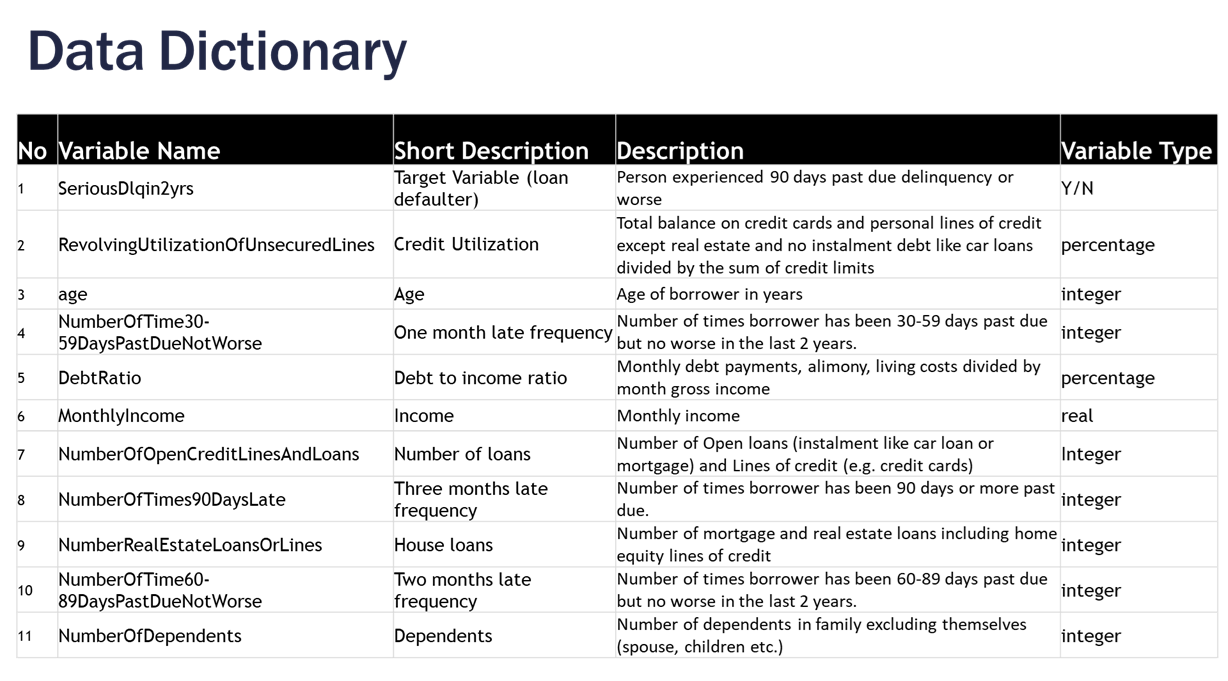

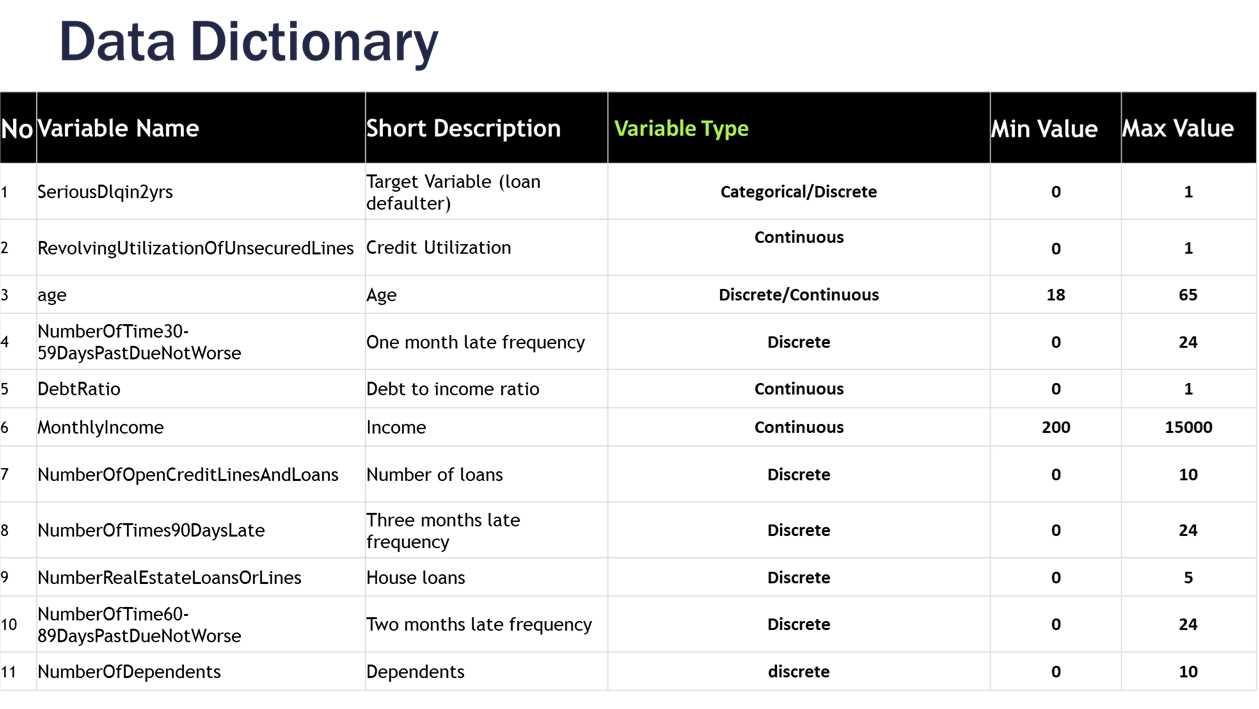

In [7]:
#Print the first 10 observations
loans.head(15)

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,6,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,7,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,8,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [8]:
# Calculating null values
loans.isnull().sum()

,0
Sr_No,0
SeriousDlqin2yrs,0
monthly_utilization,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


In [9]:
loans.isnull().sum().values.sum()# Total number of null entries in the entire data frame

np.int64(33655)

In [10]:
loans.describe()

,Sr_No,SeriousDlqin2yrs,monthly_utilization,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [11]:
loans.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sr_No,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,1.0
monthly_utilization,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,54.0


In [12]:
loans.describe(percentiles=[0.25,0.5,0.75,0.90,0.95,0.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Sr_No,150000.0,75000.500000,43301.414527,1.0,37500.750000,75000.500000,112500.250000,135000.100000,142500.05,148500.010000,150000.0
SeriousDlqin2yrs,150000.0,0.066840,0.249746,0.0,0.000000,0.000000,0.000000,0.000000,1.00,1.000000,1.0
monthly_utilization,150000.0,6.048438,249.755371,0.0,0.029867,0.154181,0.559046,0.981278,1.00,1.092956,50708.0
age,150000.0,52.295207,14.771866,0.0,41.000000,52.000000,63.000000,72.000000,78.00,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.421033,4.192781,0.0,0.000000,0.000000,0.000000,1.000000,2.00,4.000000,98.0
DebtRatio,150000.0,353.005076,2037.818523,0.0,0.175074,0.366508,0.868254,1267.000000,2449.00,4979.040000,329664.0
MonthlyIncome,120269.0,6670.221237,14384.674215,0.0,3400.000000,5400.000000,8249.000000,11666.000000,14587.60,25000.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,150000.0,8.452760,5.145951,0.0,5.000000,8.000000,11.000000,15.000000,18.00,24.000000,58.0
NumberOfTimes90DaysLate,150000.0,0.265973,4.169304,0.0,0.000000,0.000000,0.000000,0.000000,1.00,3.000000,98.0
NumberRealEstateLoansOrLines,150000.0,1.018240,1.129771,0.0,0.000000,1.000000,2.000000,2.000000,3.00,4.000000,54.0


In [13]:
loans.mean(numeric_only=True) # calculate mean of numeric columns

,0
Sr_No,75000.500000
SeriousDlqin2yrs,0.066840
monthly_utilization,6.048438
age,52.295207
NumberOfTime30-59DaysPastDueNotWorse,0.421033
DebtRatio,353.005076
MonthlyIncome,6670.221237
NumberOfOpenCreditLinesAndLoans,8.452760
NumberOfTimes90DaysLate,0.265973
NumberRealEstateLoansOrLines,1.018240


In [14]:
loans.median(numeric_only=True)

,0
Sr_No,75000.500000
SeriousDlqin2yrs,0.000000
monthly_utilization,0.154181
age,52.000000
NumberOfTime30-59DaysPastDueNotWorse,0.000000
DebtRatio,0.366508
MonthlyIncome,5400.000000
NumberOfOpenCreditLinesAndLoans,8.000000
NumberOfTimes90DaysLate,0.000000
NumberRealEstateLoansOrLines,1.000000


In [15]:
for col in loans.columns:
  print("---------------------------")
  print("The difference between mean and median for the variable",col,"is",loans[col].mean() - loans[col].median())
  print("---------------------------")

---------------------------
The difference between mean and median for the variable Sr_No is 0.0
---------------------------
---------------------------
The difference between mean and median for the variable SeriousDlqin2yrs is 0.06684
---------------------------
---------------------------
The difference between mean and median for the variable monthly_utilization is 5.894257317666888
---------------------------
---------------------------
The difference between mean and median for the variable age is 0.2952066666666653
---------------------------
---------------------------
The difference between mean and median for the variable NumberOfTime30-59DaysPastDueNotWorse is 0.4210333333333333
---------------------------
---------------------------
The difference between mean and median for the variable DebtRatio is 352.63856792286987
---------------------------
---------------------------
The difference between mean and median for the variable MonthlyIncome is 1270.2212373928442
---------

In [16]:
print("Number of features:=", len(loans.columns))#loans.shape[0]
print("Number of observations:=", len(loans))#loans.shape[1]

Number of features:= 12
Number of observations:= 150000


In [17]:
loans['NumberOfDependents'].nunique()

13

In [18]:
for col in loans.columns:
  print("---------------------------")
  print("The unique values in",col,"is",loans[col].nunique())
  print("---------------------------")

---------------------------
The unique values in Sr_No is 150000
---------------------------
---------------------------
The unique values in SeriousDlqin2yrs is 2
---------------------------
---------------------------
The unique values in monthly_utilization is 125728
---------------------------
---------------------------
The unique values in age is 86
---------------------------
---------------------------
The unique values in NumberOfTime30-59DaysPastDueNotWorse is 16
---------------------------
---------------------------
The unique values in DebtRatio is 114194
---------------------------
---------------------------
The unique values in MonthlyIncome is 13594
---------------------------
---------------------------
The unique values in NumberOfOpenCreditLinesAndLoans is 58
---------------------------
---------------------------
The unique values in NumberOfTimes90DaysLate is 19
---------------------------
---------------------------
The unique values in NumberRealEstateLoansOrLin

**Variable Data Types**

In [19]:
#What are the categorical and discrete variables? What are the continues variables.
loans.dtypes

,0
Sr_No,int64
SeriousDlqin2yrs,int64
monthly_utilization,float64
age,int64
NumberOfTime30-59DaysPastDueNotWorse,int64
DebtRatio,float64
MonthlyIncome,float64
NumberOfOpenCreditLinesAndLoans,int64
NumberOfTimes90DaysLate,int64
NumberRealEstateLoansOrLines,int64


**Discrete :**

  * SeriousDlqin2yrs
  * age
  * NumberOfTime30-59DaysPastDueNotWorse
  * NumberOfOpenCreditLinesAndLoans
  * NumberOfTimes90DaysLate
  * NumberRealEstateLoansOrLines
  * NumberOfTime60-89DaysPastDueNotWorse
  * NumberOfDependents

**Continuous :**

  * monthly_utilization
  * DebtRatio
  * MonthlyIncome

**Nominal/Categorical :**

  * No Nominal Variables

  * a nominal variable is a type of data used to label or categorize things without assigning any numerical value or order
  

# Discrete variables exploration

  * **Tip :** Note down the observations for each variable

## Number of dependents is in Float ?

In [20]:
loans['NumberOfDependents'].value_counts()

,count
NumberOfDependents,
0.0,86902
1.0,26316
2.0,19522
3.0,9483
4.0,2862
5.0,746
6.0,158
7.0,51
8.0,24


*Convert it to integer

In [21]:
loans['NumberOfDependents']=loans['NumberOfDependents'].astype('Int64')

In [22]:
loans['NumberOfDependents'].value_counts()

,count
NumberOfDependents,
0,86902
1,26316
2,19522
3,9483
4,2862
5,746
6,158
7,51
8,24


## Check for Null Values

In [23]:
#Are there any   variables with missing values?
loans.isnull().sum()

,0
Sr_No,0
SeriousDlqin2yrs,0
monthly_utilization,0
age,0
NumberOfTime30-59DaysPastDueNotWorse,0
DebtRatio,0
MonthlyIncome,29731
NumberOfOpenCreditLinesAndLoans,0
NumberOfTimes90DaysLate,0
NumberRealEstateLoansOrLines,0


**Steps for exploration of discrete variables:**



1.   Use countplot, barplot etc.
2.   Use percentiles.
3.   Check for Null values.
4.   Decide upon outliers.



## Serious Delinquency

In [24]:
# print(loans['SeriousDlqin2yrs'].value_counts())
loans['SeriousDlqin2yrs'].value_counts(sort=False)

,count
SeriousDlqin2yrs,
1,10026
0,139974


<Axes: xlabel='SeriousDlqin2yrs', ylabel='count'>

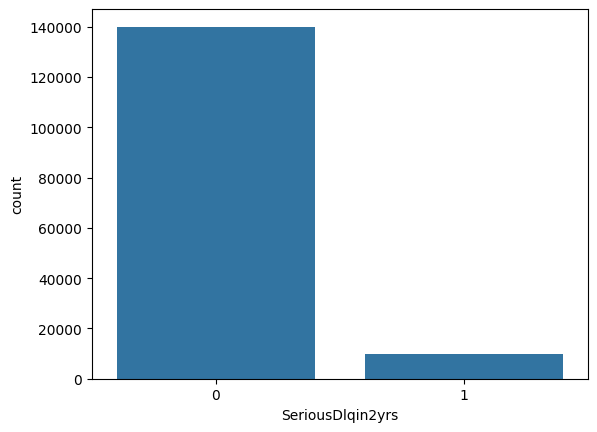

In [25]:
sns.countplot(x  = "SeriousDlqin2yrs" , data = loans)

* No Outliers in this variable and Class imbalance exists

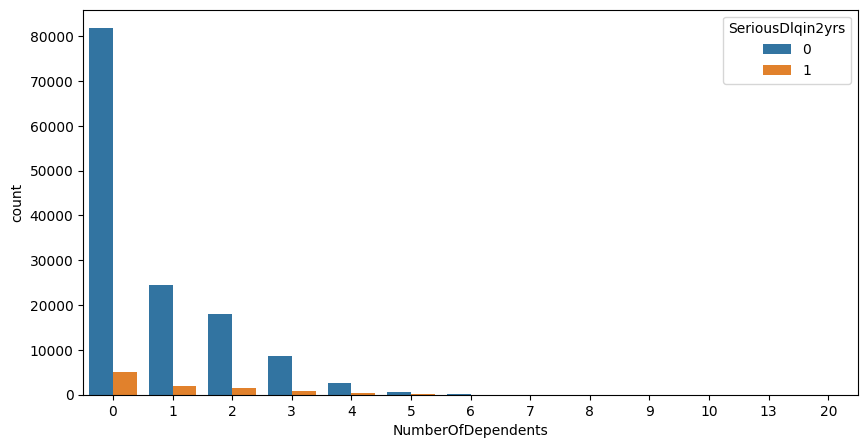

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x='NumberOfDependents', hue = "SeriousDlqin2yrs" , data = loans) # class imbalance
plt.show()

* Tip: create a rough colab worksheet copy this cell as well as other needed info for reference.

<Axes: xlabel='age', ylabel='count'>

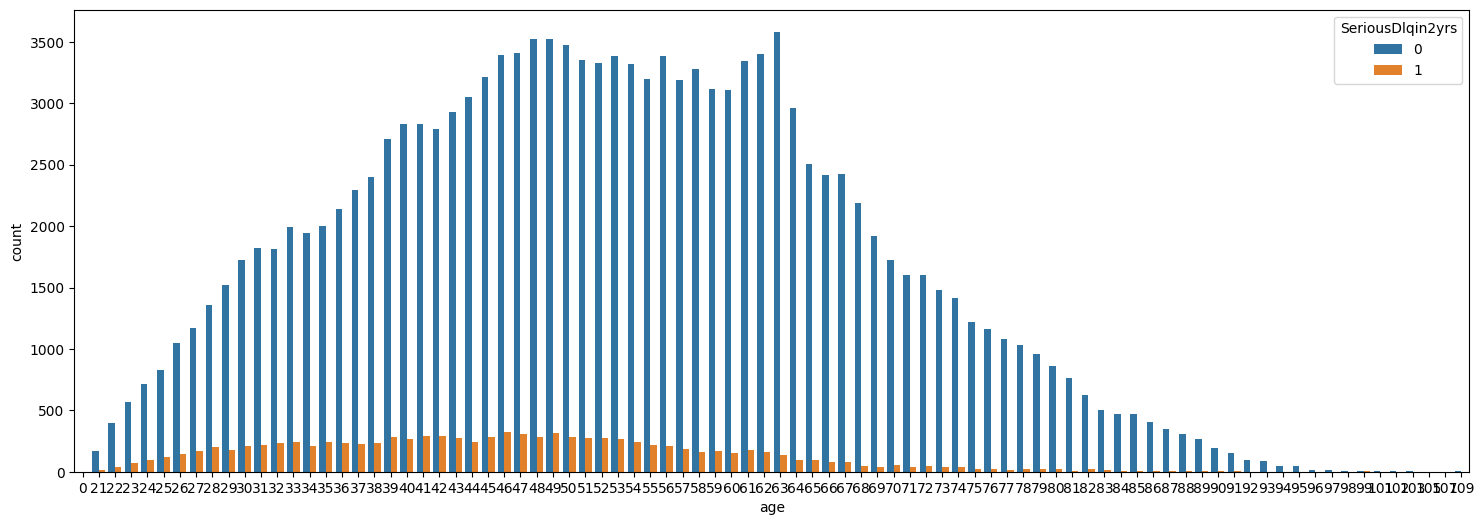

In [27]:
plt.figure(figsize=(18,6))
sns.countplot(hue = "SeriousDlqin2yrs" , x = 'age', data = loans)

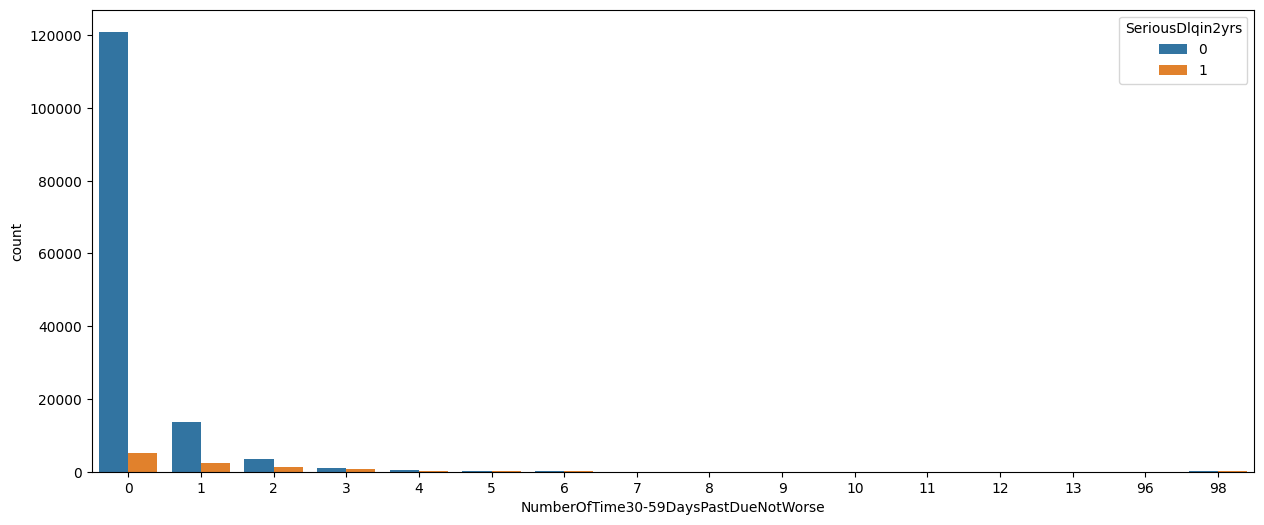

In [28]:
plt.figure(figsize=(15,6))
sns.countplot(hue = "SeriousDlqin2yrs" , x = 'NumberOfTime30-59DaysPastDueNotWorse', data = loans)
plt.show()

<Axes: xlabel='NumberRealEstateLoansOrLines', ylabel='NumberOfDependents'>

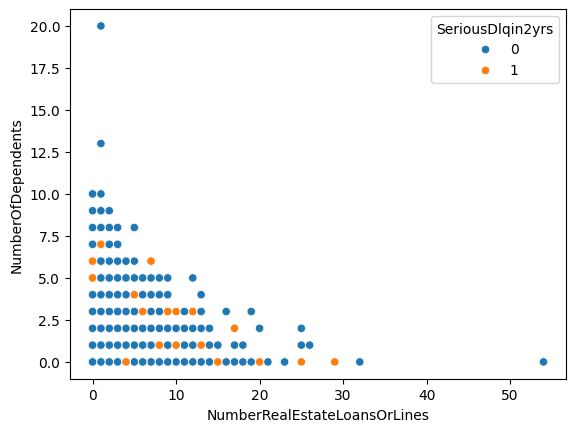

In [29]:
sns.scatterplot(data=loans, x="NumberRealEstateLoansOrLines", y="NumberOfDependents", hue="SeriousDlqin2yrs")

## Age

In [30]:
print(loans['age'].nunique())

86


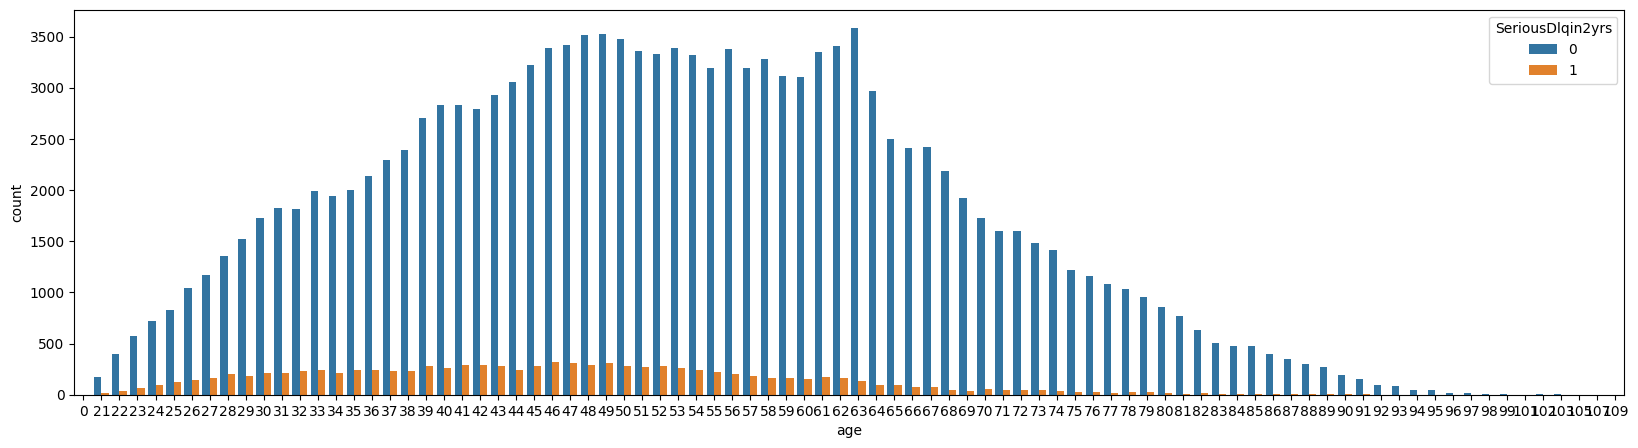

In [31]:

plt.figure(figsize=(20,5))# this doesnt work
sns.countplot(loans, x="age",  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()


no delinquents after 90.

In [32]:
loans.loc[loans['age']<20].value_counts().sum()

np.int64(1)

In [33]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

,count
NumberOfTime30-59DaysPastDueNotWorse,
0,126018
1,16033
2,4598
3,1754
4,747
5,342
98,264
6,140
7,54


## 1 month delay

In [34]:
print(loans['NumberOfTime30-59DaysPastDueNotWorse'].nunique())

16


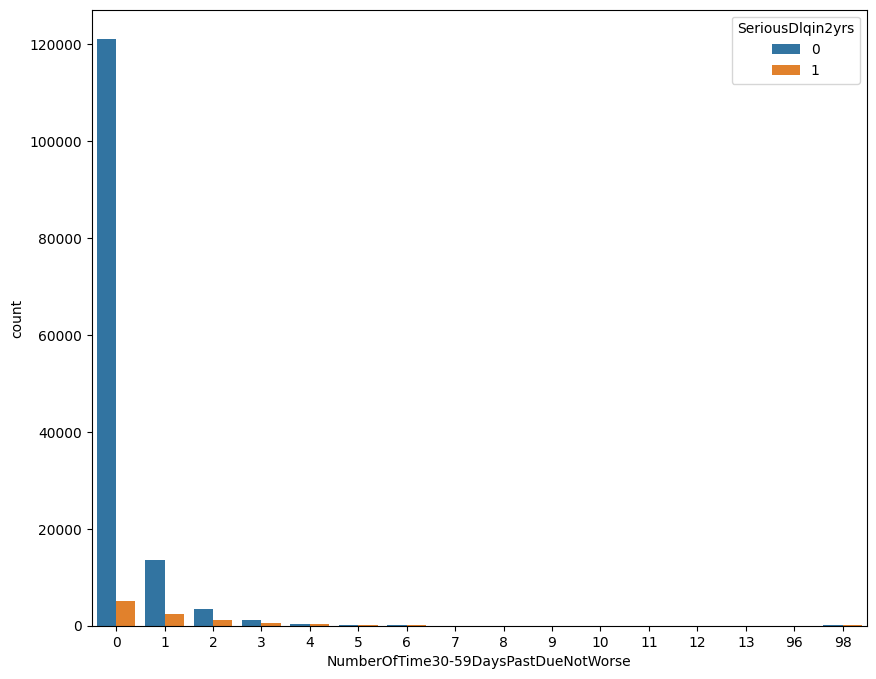

In [35]:
plt.figure(figsize=(10,8))# this doesnt work
sns.countplot(loans, x="NumberOfTime30-59DaysPastDueNotWorse",  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [36]:
loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()

,count
NumberOfTime30-59DaysPastDueNotWorse,
0,126018
1,16033
2,4598
3,1754
4,747
5,342
98,264
6,140
7,54


## Number of open credit loans

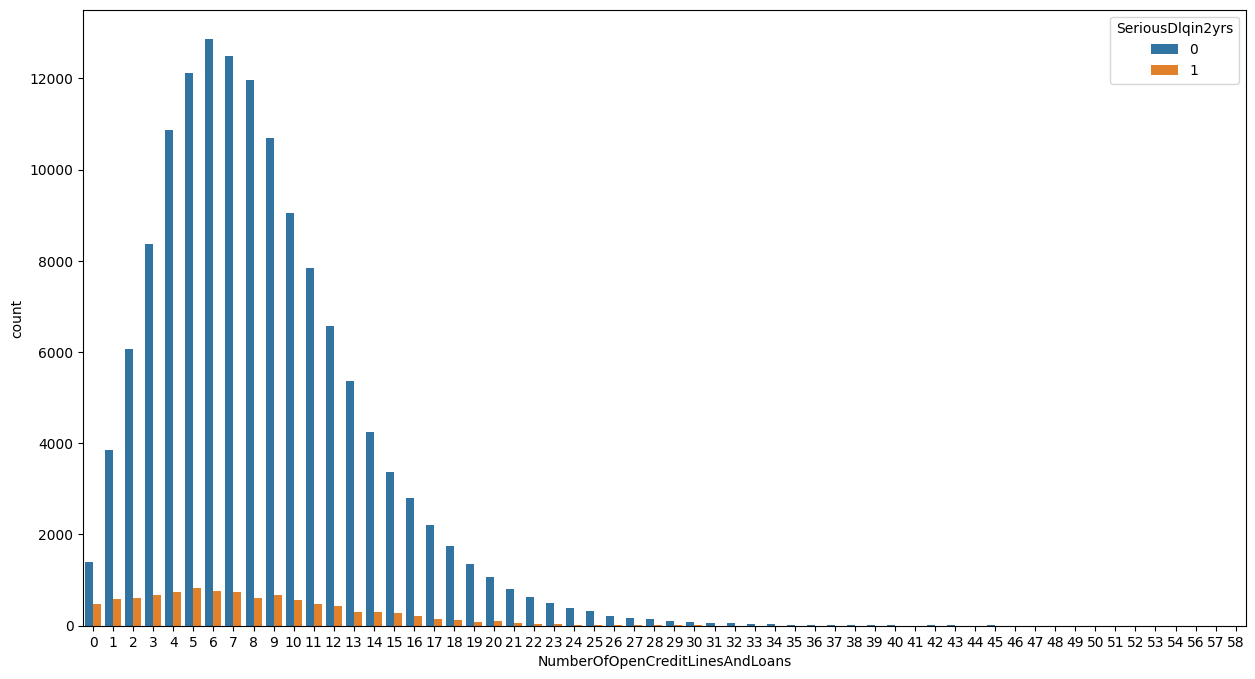

In [37]:
plt.figure(figsize=(15,8))# this doesnt work
sns.countplot(loans, x="NumberOfOpenCreditLinesAndLoans",  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [38]:
loans['NumberOfOpenCreditLinesAndLoans'].value_counts(sort=True)

,count
NumberOfOpenCreditLinesAndLoans,
6,13614
7,13245
5,12931
8,12562
4,11609
9,11355
10,9624
3,9058
11,8321


## 3 month late

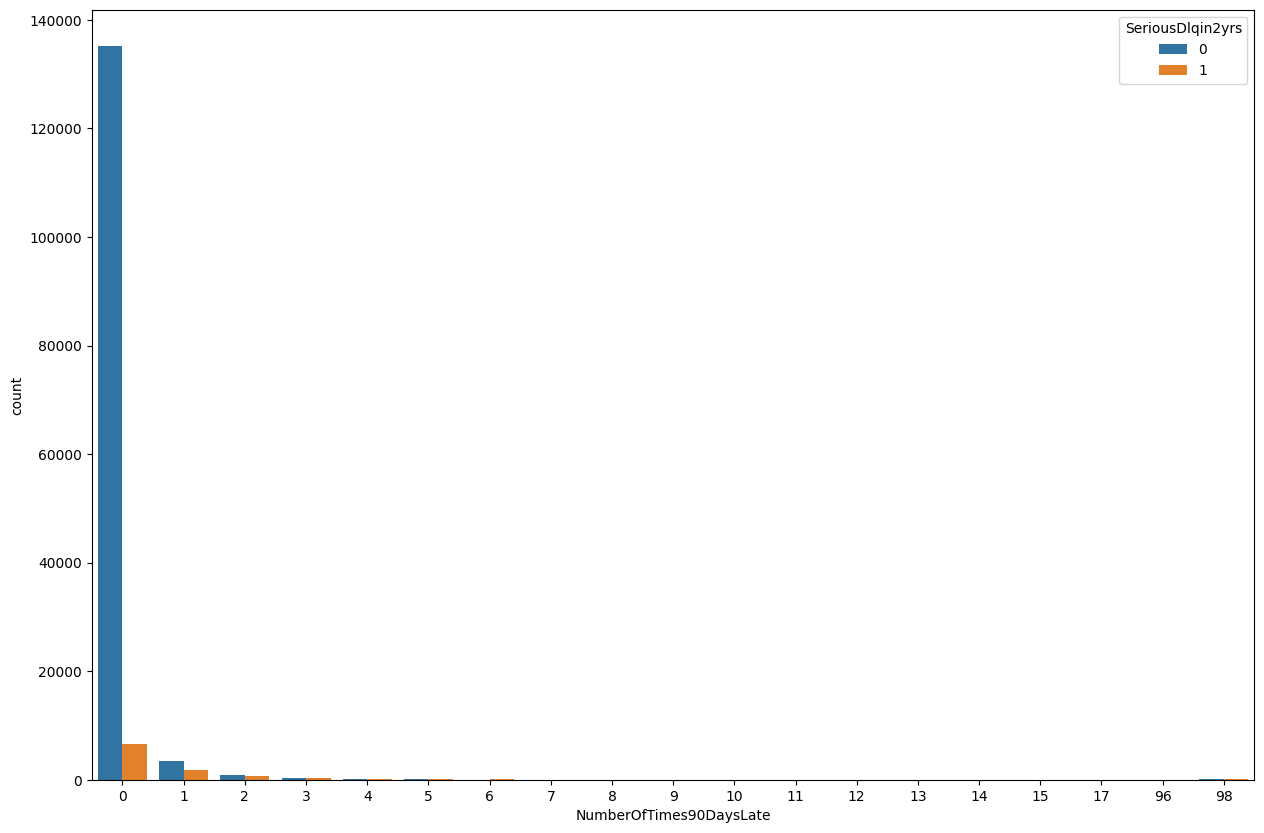

In [39]:
plt.figure(figsize=(15,10))# this doesnt work
sns.countplot(loans, x="NumberOfTimes90DaysLate",  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [40]:
loans['NumberOfTimes90DaysLate'].value_counts()

,count
NumberOfTimes90DaysLate,
0,141662
1,5243
2,1555
3,667
4,291
98,264
5,131
6,80
7,38


## number of real estate loans

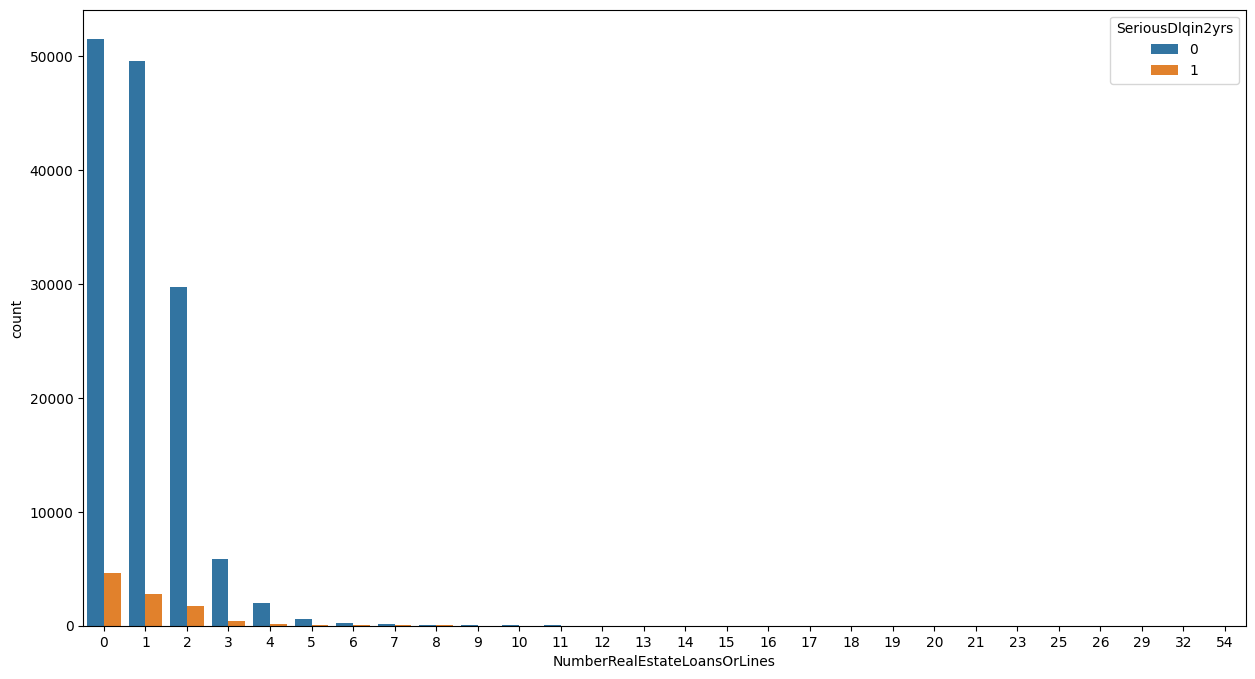

In [41]:
plt.figure(figsize=(15,8))# this doesnt work
sns.countplot(loans, x='NumberRealEstateLoansOrLines',  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [42]:
loans['NumberRealEstateLoansOrLines'].value_counts()

,count
NumberRealEstateLoansOrLines,
0,56188
1,52338
2,31522
3,6300
4,2170
5,689
6,320
7,171
8,93


## 2 month delay

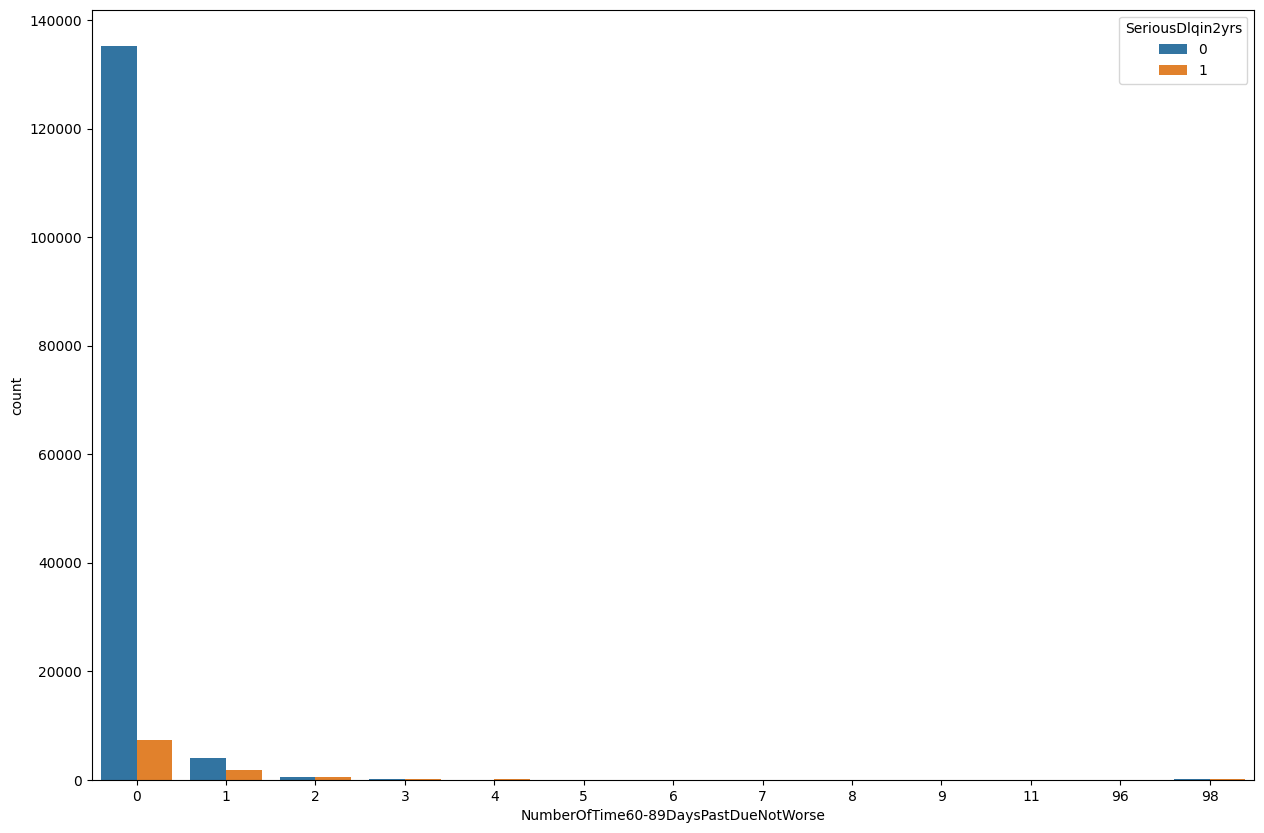

In [43]:
plt.figure(figsize=(15,10))# this doesnt work
sns.countplot(loans, x='NumberOfTime60-89DaysPastDueNotWorse',  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [44]:
loans['NumberOfTime60-89DaysPastDueNotWorse'].value_counts()

,count
NumberOfTime60-89DaysPastDueNotWorse,
0,142396
1,5731
2,1118
3,318
98,264
4,105
5,34
6,16
7,9


## dependents.

In [45]:
loans['NumberOfDependents'].isnull().any()

np.True_

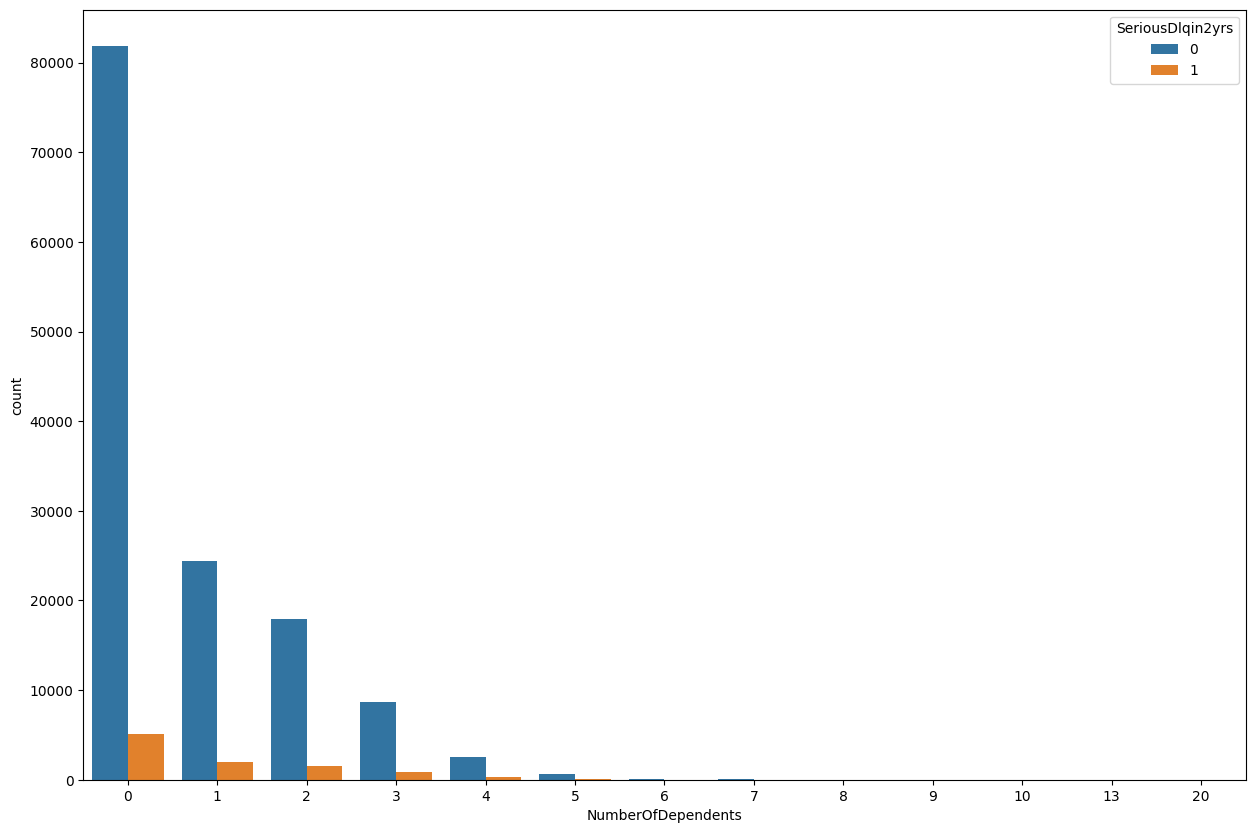

In [46]:
plt.figure(figsize=(15,10))# this doesnt work
sns.countplot(loans, x='NumberOfDependents',  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()

In [47]:
loans['NumberOfDependents'].value_counts()

,count
NumberOfDependents,
0,86902
1,26316
2,19522
3,9483
4,2862
5,746
6,158
7,51
8,24


# Continuous variables exploration

**Steps for exploration of Count variables:**



1.   Use boxplot, histplot etc.
2.   Use percentiles.
3.   Check for Null values.
4.   Decide upon outliers.



### Credit utilization

In [48]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

In [49]:
# cols=loans.columns
# for var in cols:
#   # print(loans[var].value_counts())
#   # print(pd.unique(loans[var]).sum())
#   print(loans[var].nunique())

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48bc18f9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48bc18e410>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48c17fc1d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f48bc18cb50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f48bc184050>],
 'means': []}

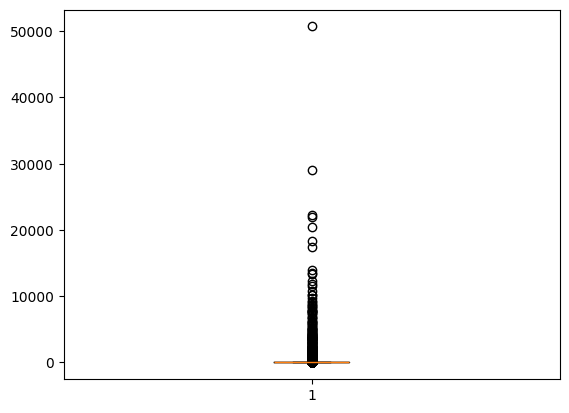

In [50]:
plt.boxplot(loans["monthly_utilization"])

In [51]:
util_percentiles=loans['monthly_utilization'].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles,2)

,monthly_utilization
0.000,0.00
0.100,0.00
0.200,0.02
0.300,0.04
0.400,0.08
0.500,0.15
0.750,0.56
0.800,0.70
0.900,0.98
0.910,1.00


In [52]:
loans['monthly_utilization'].describe()

,monthly_utilization
count,150000.000000
mean,6.048438
std,249.755371
min,0.000000
25%,0.029867
50%,0.154181
75%,0.559046
max,50708.000000


<Axes: xlabel='monthly_utilization', ylabel='Count'>

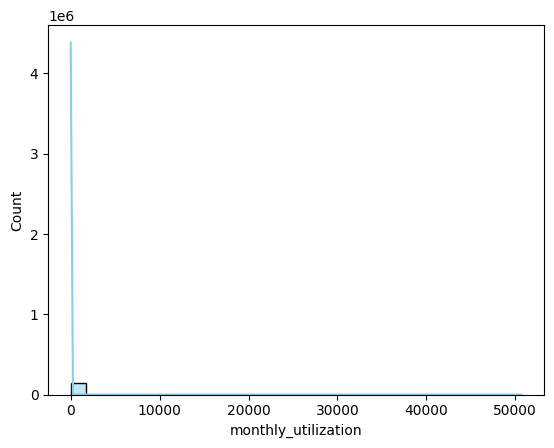

In [53]:
sns.histplot(loans["monthly_utilization"], bins=30, kde=True, color='skyblue')#, ax=axes[1])

* Plot again after cleaning the data

### Debt Ratio

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48bef21350>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48bef22690>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48bef20850>],
 'medians': [<matplotlib.lines.Line2D at 0x7f48bef23a50>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f48bef14410>],
 'means': []}

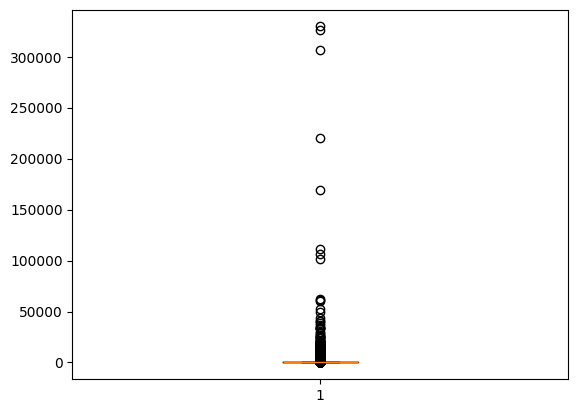

In [54]:
plt.boxplot(loans['DebtRatio'])

In [55]:
round(loans['DebtRatio'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1]),2)

,DebtRatio
0.050,0.00
0.100,0.03
0.250,0.18
0.500,0.37
0.750,0.87
0.800,4.00
0.900,1267.00
0.910,1462.00
0.950,2449.00
0.960,2791.00


<Axes: xlabel='DebtRatio', ylabel='Count'>

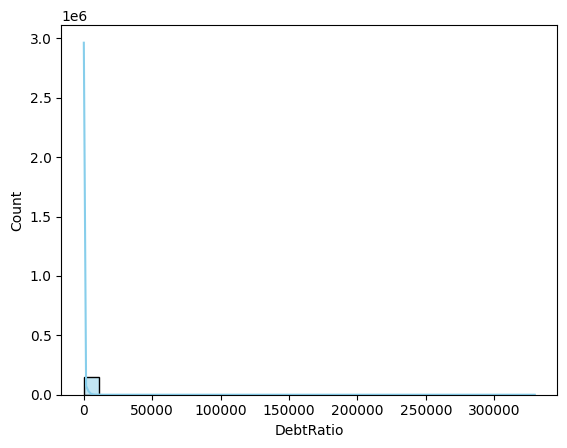

In [56]:
sns.histplot(loans["DebtRatio"], bins=30, kde=True, color='skyblue')#, ax=axes[1])

### MonthlyIncome

In [57]:
loans['MonthlyIncome'].isnull().any()

np.True_

<Axes: >

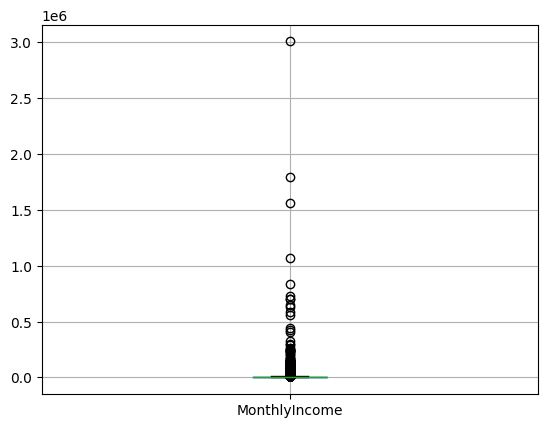

In [58]:
loans.boxplot(column="MonthlyIncome")

{'whiskers': [<matplotlib.lines.Line2D at 0x7f48bec8aa90>,
 'caps': [<matplotlib.lines.Line2D at 0x7f48bec8be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f48bec8a310>],
 'medians': [<matplotlib.lines.Line2D at 0x7f48bec95390>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f48bec959d0>],
 'means': []}

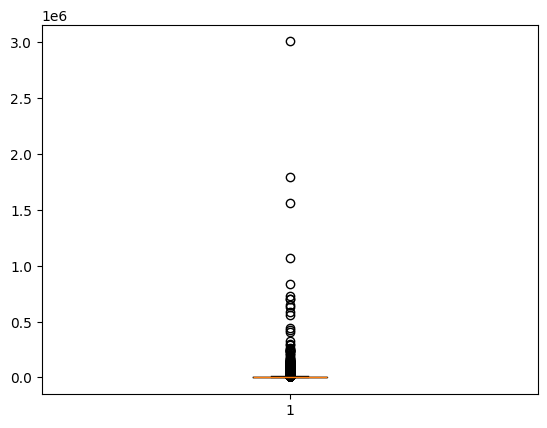

In [59]:
#loans.boxplot(column="MonthlyIncome")
non_null_monthly_income=loans["MonthlyIncome"][loans["MonthlyIncome"].isnull()==False]
plt.boxplot(non_null_monthly_income)

In [60]:
# round(loans['MonthlyIncome'].describe(),2)

<Axes: xlabel='MonthlyIncome', ylabel='Count'>

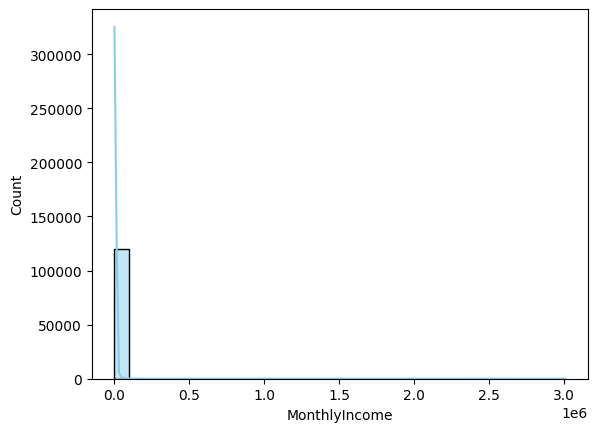

In [61]:
sns.histplot(non_null_monthly_income, bins=30, kde=True, color='skyblue')#, ax=axes[1])

In [62]:
round(loans['MonthlyIncome'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1]),2)

,MonthlyIncome
0.050,1300.00
0.100,2005.00
0.250,3400.00
0.500,5400.00
0.750,8249.00
0.800,9083.00
0.900,11666.00
0.910,12000.00
0.950,14587.60
0.960,15636.28


In [63]:
loans.loc[loans['MonthlyIncome']<200].value_counts().sum()


np.int64(2338)

In [64]:
loans.loc[loans['MonthlyIncome']<200].value_counts().sum()/len(loans)

np.float64(0.015586666666666667)

In [65]:
#Find the percentage of missing values
print("Count of missing values")
print(loans['MonthlyIncome'].isnull().sum())
print("% of missing values")
print(round(loans['MonthlyIncome'].isnull().sum()/len(loans),2))

Count of missing values
29731
% of missing values
0.2


# [3] Data Cleaning

# Data Cleaning: Continuous

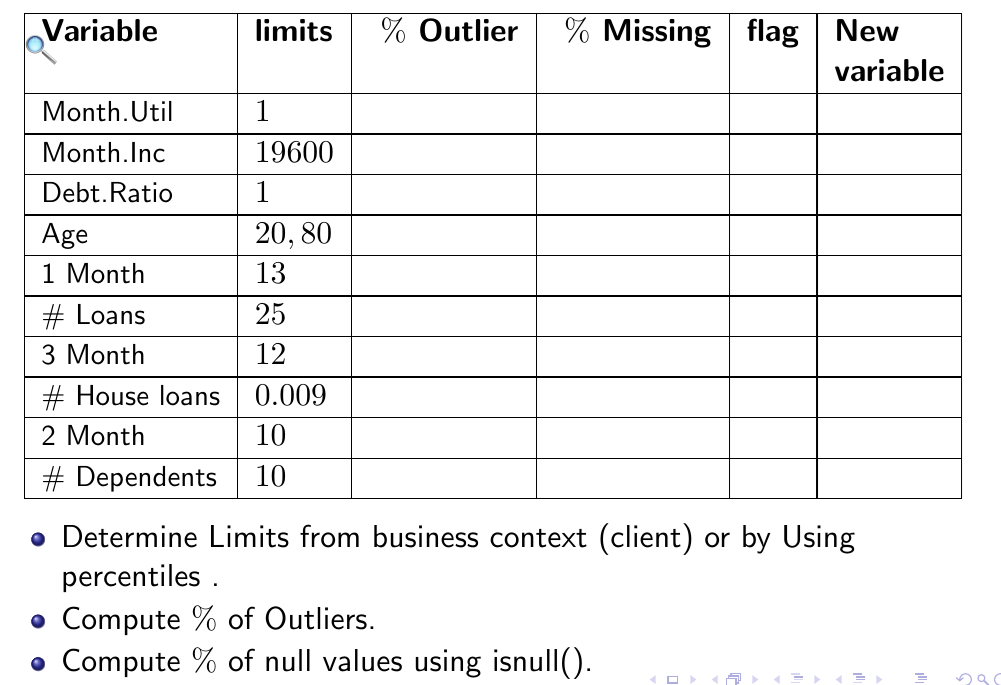

Example:
Percentiles:
```
loans['monthly_utilization'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
```
Percentage of Outliers
```
len(loans.loc[loans['NumberOfDependents']>upper_limit])/len(loans)
```
Percentage of null values

```
loans['NumberOfDependents'].isnull().sum()/len(loans)
```

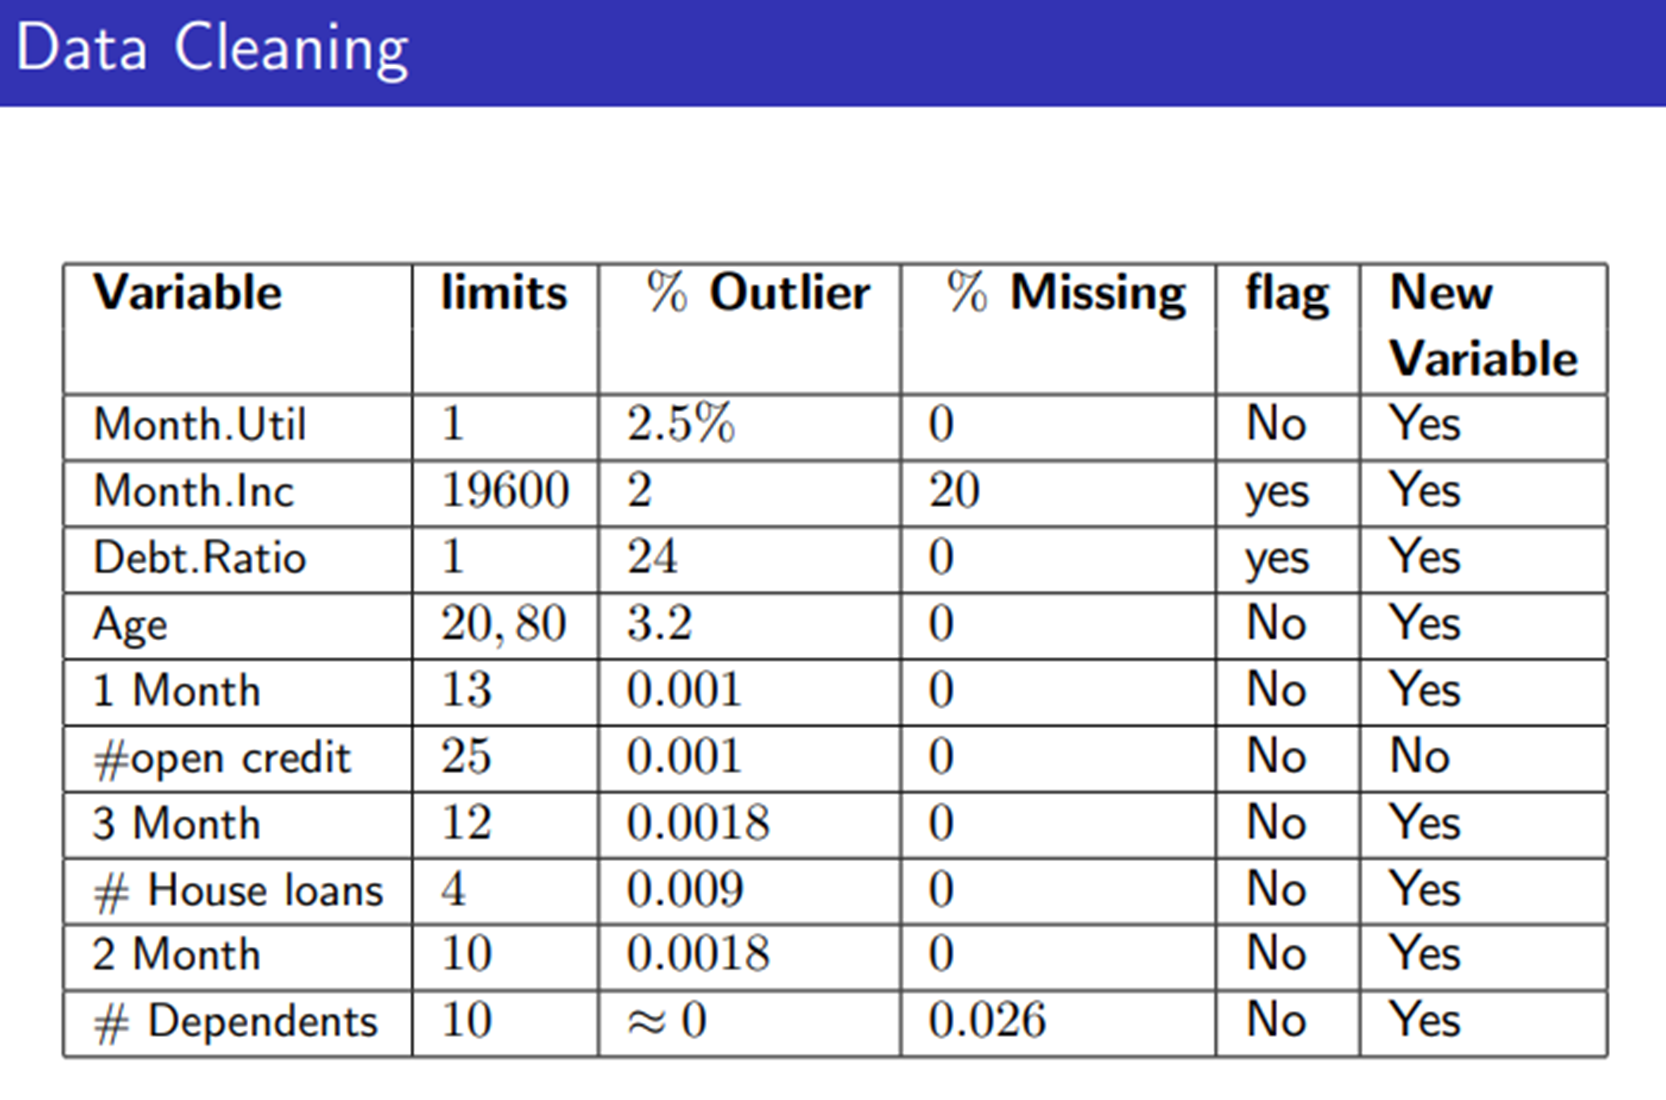

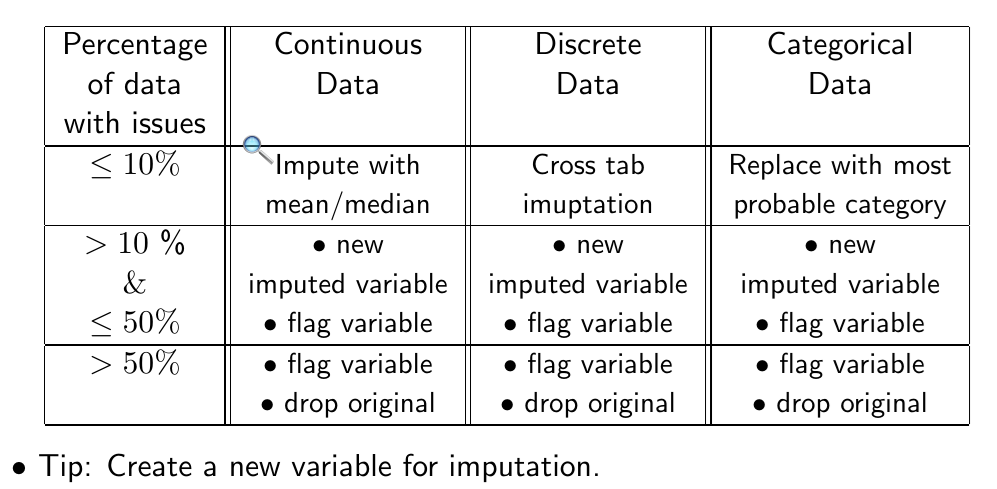

### Data Cleaning - Credit_utilization

In [66]:
util_percentiles=loans['monthly_utilization'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
# util_percentiles
round(util_percentiles,2)
# round(loans['monthly_utilization'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1]),2)

,monthly_utilization
0.050,0.00
0.100,0.00
0.250,0.03
0.500,0.15
0.750,0.56
0.800,0.70
0.900,0.98
0.910,1.00
0.950,1.00
0.960,1.00


In [67]:
median_util=loans['monthly_utilization'].median()
median_util

0.154180737

In [68]:
loans['cred_util_new']=loans['monthly_utilization']
loans.loc[loans['monthly_utilization']>1,'cred_util_new']=median_util

In [69]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 13 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

* Check percentiles again, after imputation

In [70]:
# percentile distribution for new variable
util_percentiles1=loans['cred_util_new'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])
round(util_percentiles1,2)


,cred_util_new
0.050,0.00
0.100,0.00
0.250,0.03
0.500,0.15
0.750,0.51
0.800,0.63
0.900,0.93
0.910,0.95
0.950,1.00
0.960,1.00


<Axes: xlabel='cred_util_new', ylabel='Count'>

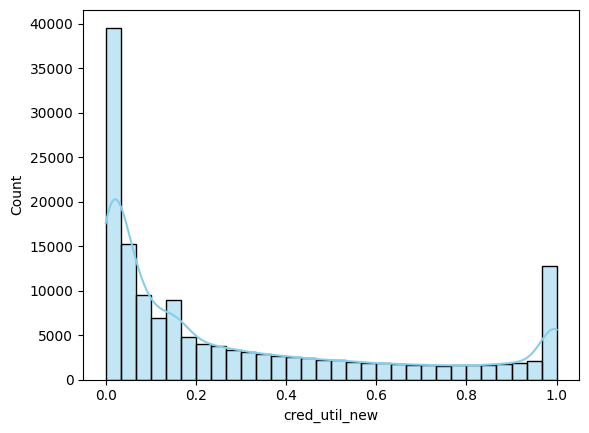

In [71]:
sns.histplot(loans["cred_util_new"], bins=30, kde=True, color='skyblue')#, ax=axes[1])

### Data Cleaning Monthly Income

In [72]:
#Find the missing value percentage in monthly income
#Once identified where missing values exist, the next task usually is to fill them (data imputation). Depending upon the context,
#in this case, I am assigning median value to all those positions where missing value is present:


In [73]:
round(loans['MonthlyIncome'].quantile([0.05, 0.1, 0.25, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1]),2)

,MonthlyIncome
0.050,1300.00
0.100,2005.00
0.250,3400.00
0.500,5400.00
0.750,8249.00
0.800,9083.00
0.900,11666.00
0.910,12000.00
0.950,14587.60
0.960,15636.28


In [74]:
loans['MonthlyIncome'].isnull().sum()

np.int64(29731)

In [75]:
round(loans['MonthlyIncome'].isnull().sum()/len(loans),2)

np.float64(0.2)

* create a flag variable

In [76]:
loans['MonthlyIncome'].value_counts()

,count
MonthlyIncome,
5000.0,2757
4000.0,2106
6000.0,1934
3000.0,1758
0.0,1634
...,...
10194.0,1
9464.0,1
11179.0,1


In [77]:
loans['MonthlyIncome_ind'] = 1
loans.loc[loans['MonthlyIncome'].isnull(), 'MonthlyIncome_ind'] = 0
loans.loc[loans['MonthlyIncome']>19600, 'MonthlyIncome_ind'] = 0
loans.loc[loans['MonthlyIncome']<200, 'MonthlyIncome_ind'] = 0
loans['MonthlyIncome_ind'].value_counts()

,count
MonthlyIncome_ind,
1,115529
0,34471


* Imputation

In [78]:
loans['MonthlyIncome_new'] = loans['MonthlyIncome']
loans.loc[loans['MonthlyIncome'].isnull(), 'MonthlyIncome_new'] = loans['MonthlyIncome'].median()
loans.loc[loans['MonthlyIncome']>19600, 'MonthlyIncome_new'] = loans['MonthlyIncome'].median()
loans.loc[loans['MonthlyIncome']<200, 'MonthlyIncome_new'] = loans['MonthlyIncome'].median()

In [79]:
loans['MonthlyIncome_new'].describe()

,MonthlyIncome_new
count,150000.000000
mean,5957.017380
std,3152.996184
min,200.000000
25%,4000.000000
50%,5400.000000
75%,7083.000000
max,19600.000000


<Axes: xlabel='MonthlyIncome_new', ylabel='Count'>

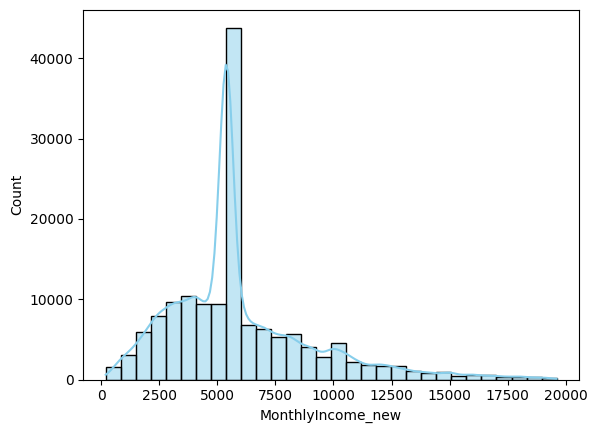

In [80]:
sns.histplot(loans["MonthlyIncome_new"], bins=30, kde=True, color='skyblue')#, ax=axes[1])

### Data cleaning - Debt Ratio

* 24\% of data is outliers
* Create flag variable
* Impute with median

In [81]:
# creating flag variables. FIRST CHECK THE DATA FRAME
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

* creating a flag variable

In [82]:
loans['DebtRatio_ind']=1
loans.loc[loans['DebtRatio']>1,'DebtRatio_ind']=0

In [83]:
loans.DebtRatio_ind.value_counts()

,count
DebtRatio_ind,
1,114863
0,35137


* checking if the number of flags for each class mataches with the original data

In [84]:
len(loans.loc[loans['DebtRatio']<=1])

114863

In [85]:
len(loans.loc[loans['DebtRatio']>1])

35137

* Imputing with median

In [86]:
loans['DebtRatio_new']=loans['DebtRatio']
loans.loc[loans['DebtRatio']>1,'DebtRatio_new']=loans['DebtRatio'].median()

In [87]:
loans.DebtRatio_new.describe()

,DebtRatio_new
count,150000.000000
mean,0.317893
std,0.199835
min,0.000000
25%,0.175074
50%,0.366506
75%,0.380021
max,1.000000


In [88]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

<Axes: xlabel='DebtRatio_new', ylabel='Count'>

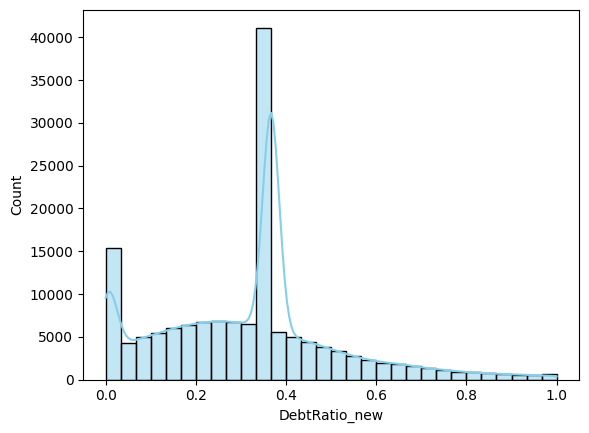

In [89]:
sns.histplot(loans["DebtRatio_new"], bins=30, kde=True, color='skyblue')#, ax=axes[1])

# Data cleaning: Discrete

### Age

In [90]:
len(loans.loc[loans['age']>80])/len(loans)

0.03290666666666667

In [91]:
loans['age_new']=loans['age']
loans.loc[loans['age']>80, 'age_new']=loans['age'].median()

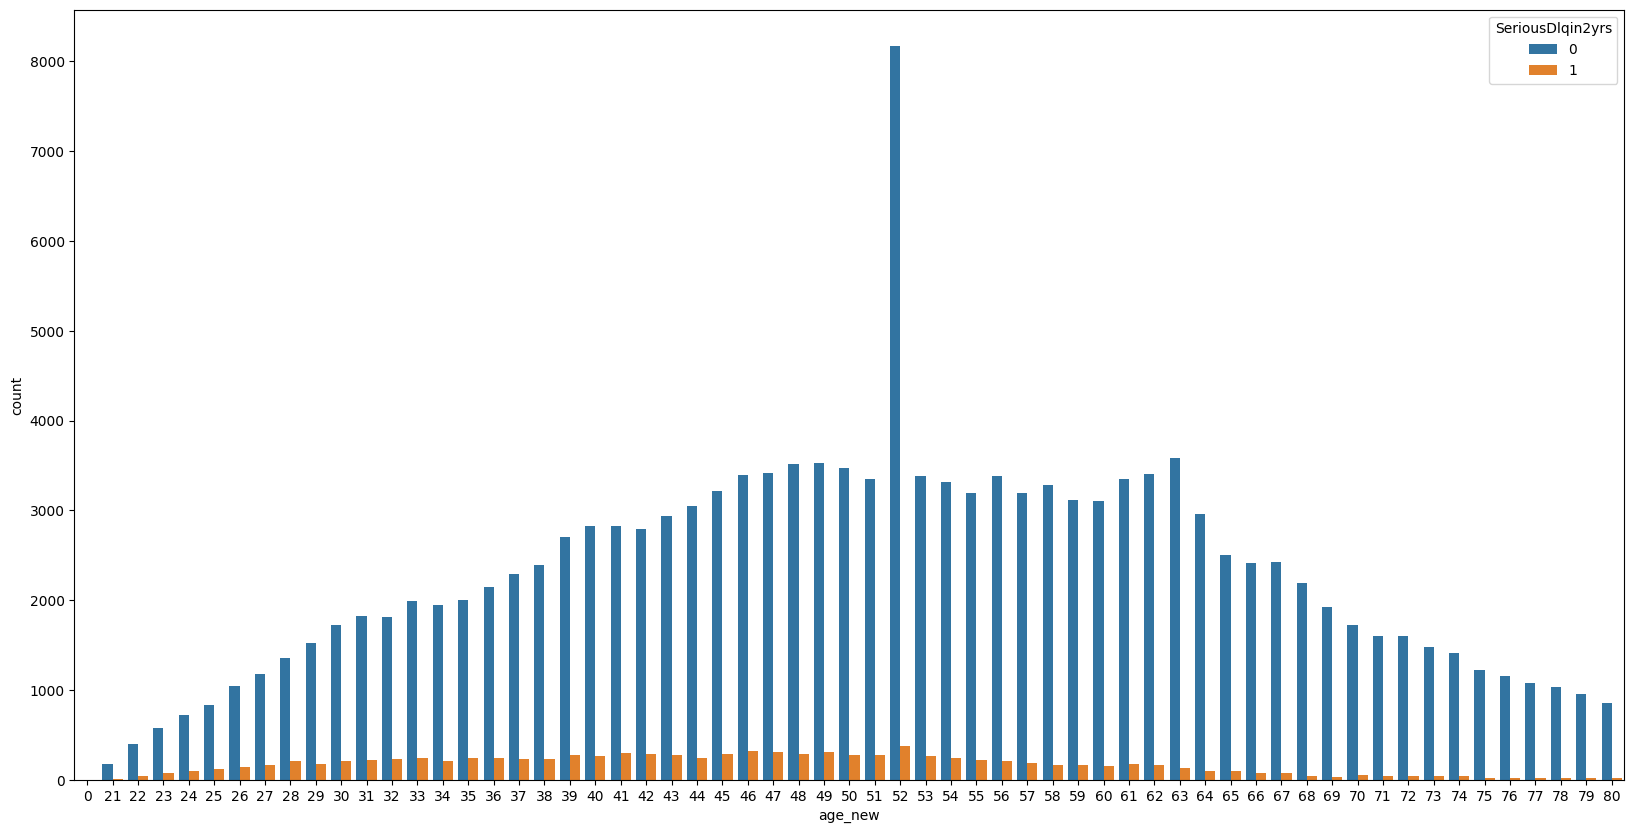

In [92]:

plt.figure(figsize=(20,10))# this doesnt work
sns.countplot(loans, x="age_new",  hue="SeriousDlqin2yrs")#,multiple="stack")#y="body_mass_g",
plt.show()


### 1 month delay

In [93]:
len(loans.loc[loans['NumberOfTime30-59DaysPastDueNotWorse']>13])/len(loans)

0.0017933333333333334

In [94]:
freq_table_30dpd=loans['NumberOfTime30-59DaysPastDueNotWorse'].value_counts()
freq_table_30dpd

,count
NumberOfTime30-59DaysPastDueNotWorse,
0,126018
1,16033
2,4598
3,1754
4,747
5,342
98,264
6,140
7,54


* Question : When should cross tab be used ?

In [95]:
#Clean the variable- Look at the cross tab of variable vs target. Impute based on target .
#Cross tab with target
import pandas as pd
cross_tab_30dpd_target=pd.crosstab(loans['NumberOfTime30-59DaysPastDueNotWorse'],loans['SeriousDlqin2yrs'])
cross_tab_30dpd_target.transpose()

NumberOfTime30-59DaysPastDueNotWorse,0,1,2,3,4,5,6,7,8,9,10,11,12,13,96,98
SeriousDlqin2yrs,,,,,,,,,,,,,,,,
0,120977,13624,3379,1136,429,188,66,26,17,8,1,0,1,0,1,121
1,5041,2409,1219,618,318,154,74,28,8,4,3,1,1,1,4,143


* **cross_tab_30dpd_target:** A pandas DataFrame (likely a cross-tabulation) with categories as rows and columns.

* **Purpose:** Normalize each row in the DataFrame to calculate percentages of column values relative to the row total.

* **apply(lambda x: x/x.sum(), axis=1):** Applies a function row-wise (axis=1) to divide each value in a row by the row's sum.

* **Result:** Converts raw counts in the table to proportions (or percentages).

* **round(..., 2):** Rounds the resulting proportions to 2 decimal places for clarity.

In [96]:
#Cross tab row Percentages
cross_tab_30dpd_target_percent=cross_tab_30dpd_target.apply(lambda x: x/x.sum(), axis=1)
round(cross_tab_30dpd_target_percent,2).transpose()

NumberOfTime30-59DaysPastDueNotWorse,0,1,2,3,4,5,6,7,8,9,10,11,12,13,96,98
SeriousDlqin2yrs,,,,,,,,,,,,,,,,
0,0.96,0.85,0.73,0.65,0.57,0.55,0.47,0.48,0.68,0.67,0.25,0.0,0.5,0.0,0.2,0.46
1,0.04,0.15,0.27,0.35,0.43,0.45,0.53,0.52,0.32,0.33,0.75,1.0,0.5,1.0,0.8,0.54


In [97]:

#Percentage of 0 and 1 are of 98 is near to percentages of 6.
#Replacing error values with 6

loans['num_30_59_dpd_new']=loans['NumberOfTime30-59DaysPastDueNotWorse']
# loans['num_30_59_dpd_new'][loans['num_30_59_dpd_new']>13]=6
loans.loc[loans['num_30_59_dpd_new']>13,'num_30_59_dpd_new']=6
loans['num_30_59_dpd_new']

loans['num_30_59_dpd_new'].value_counts()

,count
num_30_59_dpd_new,
0,126018
1,16033
2,4598
3,1754
4,747
6,409
5,342
7,54
8,25


In [98]:
cross_tab_new_target=pd.crosstab(loans['num_30_59_dpd_new'],loans['SeriousDlqin2yrs'])
round(cross_tab_new_target.apply(lambda x: x/x.sum(), axis=1),2)
# round(cross_tab_30dpd_target_percent,2)

SeriousDlqin2yrs,0,1
num_30_59_dpd_new,,
0,0.96,0.04
1,0.85,0.15
2,0.73,0.27
3,0.65,0.35
4,0.57,0.43
5,0.55,0.45
6,0.46,0.54
7,0.48,0.52
8,0.68,0.32


In [99]:
loans.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'monthly_utilization', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents', 'cred_util_new', 'MonthlyIncome_ind',
       'MonthlyIncome_new', 'DebtRatio_ind', 'DebtRatio_new', 'age_new',
       'num_30_59_dpd_new'],
      dtype='object')

### NumberOfOpenCreditLinesAndLoans

In [100]:
len(loans.loc[loans['NumberOfOpenCreditLinesAndLoans']>25])/len(loans)

0.007593333333333333

In [101]:
loans["NumberOfOpenCreditLinesAndLoans"].nunique()

58

In [102]:
loans["NumberOfOpenCreditLinesAndLoans"].value_counts(sort=False)

,count
NumberOfOpenCreditLinesAndLoans,
13,5667
4,11609
2,6666
5,12931
7,13245
3,9058
8,12562
9,11355
6,13614


In [103]:
round(len(loans.loc[loans['NumberOfOpenCreditLinesAndLoans']<20])/len(loans),2)

0.97

In [104]:
round(len(loans.loc[loans['NumberOfOpenCreditLinesAndLoans']<25])/len(loans),2)

0.99

In [105]:
loans["NumberOfOpenCreditLinesAndLoans"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

,NumberOfOpenCreditLinesAndLoans
0.000,0.0
0.100,3.0
0.200,4.0
0.300,5.0
0.400,6.0
0.500,8.0
0.750,11.0
0.800,12.0
0.900,15.0
0.910,16.0


In [106]:
loans["Open_Credit_lines_new"]=loans["NumberOfOpenCreditLinesAndLoans"]
# loans["Open_Credit_lines_new"][loans["Open_Credit_lines_new"]>20]=loans["NumberOfOpenCreditLinesAndLoans"].median()
loans.loc[loans['Open_Credit_lines_new']>18,'Open_Credit_lines_new']=loans['NumberOfOpenCreditLinesAndLoans'].median()
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 20 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Sr_No                                 150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   monthly_utilization                   150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 11  

## NumberOfTimes90DaysLate

In [107]:
len(loans.loc[loans['NumberOfTimes90DaysLate']>12])/len(loans)

0.0018533333333333334

In [108]:
cross_tab_90dpd_target=pd.crosstab(loans['NumberOfTimes90DaysLate'],loans['SeriousDlqin2yrs'])
cross_tab_90dpd_target

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,135108,6554
1,3478,1765
2,779,776
3,282,385
4,96,195
5,48,83
6,32,48
7,7,31
8,6,15


In [109]:
cross_tab_90dpd_target_percent=cross_tab_90dpd_target.astype(float).div(cross_tab_90dpd_target.sum(axis=1), axis=0)
round(cross_tab_90dpd_target_percent,2)

SeriousDlqin2yrs,0,1
NumberOfTimes90DaysLate,,
0,0.95,0.05
1,0.66,0.34
2,0.50,0.50
3,0.42,0.58
4,0.33,0.67
5,0.37,0.63
6,0.40,0.60
7,0.18,0.82
8,0.29,0.71


In [110]:
loans['num_90_dpd_new']=loans['NumberOfTimes90DaysLate']
# loans['num_90_dpd_new'][loans['num_90_dpd_new']>12]=3
loans.loc[loans['num_90_dpd_new']>12,'num_90_dpd_new']=3
loans['num_90_dpd_new']

loans['num_90_dpd_new'].value_counts(sort=False)

,count
num_90_dpd_new,
0,141662
1,5243
3,945
2,1555
5,131
4,291
10,8
9,19
6,80


## NumberRealEstateLoansOrLines

In [111]:
len(loans.loc[loans['NumberRealEstateLoansOrLines']>4])/len(loans)

0.00988

In [112]:
loans["NumberRealEstateLoansOrLines"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

,NumberRealEstateLoansOrLines
0.000,0.0
0.100,0.0
0.200,0.0
0.300,0.0
0.400,1.0
0.500,1.0
0.750,2.0
0.800,2.0
0.900,2.0
0.910,2.0


In [113]:
loans["Real_estate_loans_new"]=loans["NumberRealEstateLoansOrLines"]
# loans["Real_estate_loans_new"][loans["Real_estate_loans_new"]>4]=loans["NumberRealEstateLoansOrLines"].median()
loans.loc[loans['Real_estate_loans_new']>4,'Real_estate_loans_new']=loans['NumberRealEstateLoansOrLines'].median()

## NumberOfTime60-89DaysPastDueNotWorse

In [114]:
len(loans.loc[loans['NumberOfTime60-89DaysPastDueNotWorse']>10])/len(loans)

0.0018

In [115]:
loans["NumberOfTime60-89DaysPastDueNotWorse"].quantile([0, 0.1, 0.2,0.3,0.4, 0.5, 0.75, 0.80, 0.9,0.91,0.95,0.96,0.97,0.975,0.98,0.99,1])

,NumberOfTime60-89DaysPastDueNotWorse
0.000,0.0
0.100,0.0
0.200,0.0
0.300,0.0
0.400,0.0
0.500,0.0
0.750,0.0
0.800,0.0
0.900,0.0
0.910,0.0


In [116]:
loans['num_60_dpd_new']=loans['NumberOfTime60-89DaysPastDueNotWorse']
loans.loc[loans['num_60_dpd_new']>10,'num_60_dpd_new']=3
loans['num_60_dpd_new']

loans['num_60_dpd_new'].value_counts(sort=False)

,count
num_60_dpd_new,
0,142396
1,5731
2,1118
5,34
3,588
4,105
6,16
7,9
8,2


## NumberOfDependents

In [117]:
len(loans.loc[loans['NumberOfDependents']>10])/len(loans)

1.3333333333333333e-05

In [118]:
len(loans.loc[loans['NumberOfDependents'].isnull()])/len(loans)

0.02616

In [119]:
loans['NumberOfDependents'].isnull().sum()/len(loans)

np.float64(0.02616)

In [120]:
loans["NumberOfDependents"].value_counts()

,count
NumberOfDependents,
0,86902
1,26316
2,19522
3,9483
4,2862
5,746
6,158
7,51
8,24


In [121]:
loans["NumberOfDependents"].isnull().sum()

np.int64(3924)

In [122]:
loans["NumberOfDependents_new"]=loans["NumberOfDependents"]
loans.loc[(loans['NumberOfDependents_new']>10) | (loans['NumberOfDependents_new'].isnull()), 'NumberOfDependents_new'] = loans['NumberOfDependents'].median()

In [123]:
loans["NumberOfDependents_new"].isnull().sum()

np.int64(0)

In [124]:
loans["NumberOfDependents_new"].value_counts()

,count
NumberOfDependents_new,
0,90828
1,26316
2,19522
3,9483
4,2862
5,746
6,158
7,51
8,24


# Exporting the final dataset

In [125]:
loans.to_csv("loans_cleaned.csv")

# Importing Already Cleaned Dataset

In [126]:
loans=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Credit_Risk_Cleaned/Cleaned_cs_training.csv")

In [127]:
loans.describe()

,Sr_No,SeriousDlqin2yrs,util_new,age_new,num_30_59_dpd_new,DebtRatio_new_ind,DebtRatio_new,MonthlyIncome_ind,MonthlyIncome_new,Open_Credit_lines_new,num_90_dpd_new,Real_estate_loans_new,num_60_dpd_new,NumberOfDependents_new
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,0.300469,52.161007,0.256067,0.234247,0.317893,0.801793,5901.911800,8.009433,0.095007,0.962960,0.070087,0.762720
std,43301.414527,0.249746,0.334855,14.584992,0.737857,0.423528,0.199835,0.398650,3297.785678,4.326973,0.488967,0.938918,0.352385,1.097208
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.000000,0.175074,1.000000,3903.000000,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154178,52.000000,0.000000,0.000000,0.366506,1.000000,5400.000000,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.506929,62.000000,0.000000,0.000000,0.380021,1.000000,7100.000000,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,1.000000,90.000000,12.000000,1.000000,1.000000,1.000000,20000.000000,20.000000,12.000000,4.000000,11.000000,8.000000


In [128]:
loans.columns

Index(['Sr_No', 'SeriousDlqin2yrs', 'util_new', 'age_new', 'num_30_59_dpd_new',
       'DebtRatio_new_ind', 'DebtRatio_new', 'MonthlyIncome_ind',
       'MonthlyIncome_new', 'Open_Credit_lines_new', 'num_90_dpd_new',
       'Real_estate_loans_new', 'num_60_dpd_new', 'NumberOfDependents_new'],
      dtype='object')

# [4] Model Building and Validation

# Model - 1: Logistic Regression.

In [129]:
X = loans.drop(['Sr_No', 'SeriousDlqin2yrs'],axis = 1)
y = loans['SeriousDlqin2yrs']

In [130]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logistic = LogisticRegression()
logistic.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [131]:
# Checking the intercept and coefficient values.
print("Intercept =" , logistic.intercept_)
print("coefficients = \n " , logistic.coef_)

Intercept = [-0.35923525]
coefficients = 
  [[ 4.27928146e-01 -4.92073072e-02  5.06261704e-01 -4.17394037e-02
   3.59124656e-02 -2.74554790e-01 -5.80651807e-05  6.45501177e-04
   8.42169632e-01  8.63401657e-02  5.25934934e-01 -7.59502211e-02]]


In [132]:
# calculating the accuracy of the model on train data
import numpy as np
from sklearn.metrics import confusion_matrix

predict = logistic.predict(X)
cm = confusion_matrix(y,predict)
print("COnfusion matrix = \n" , cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Overall accuracy for all the variables = " , accuracy)

COnfusion matrix = 
 [[138858   1116]
 [  8418   1608]]
Overall accuracy for all the variables =  0.93644


* **Checking the p value of the variables to find the impactful and non impactful variables.**

A variable is impactful if the p value is $<$0.05 and non impactful if the p value is $\ge$ 0.05.

In [133]:
# Checking the p value for individual impact of the variables on the targe variable.
import statsmodels.api as sm
sm = sm.Logit(y,X)
sm.fit()
print(sm.fit().summary())

Optimization terminated successfully.
         Current function value: 0.200079
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.200079
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149988
Method:                           MLE   Df Model:                           11
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1846
Time:                        04:44:12   Log-Likelihood:                -30012.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------

## Multicollinearity Checking

**VIF**

If VIF $>5$ for any two or more variables, then it is a clear case of multicollinearity between those variables.

In [134]:
# Defining user defined function for Variation Inflation Factor
def vif_cal(input_data,dependent_col):
  import statsmodels.formula.api as sm
  x_vars=input_data.drop([dependent_col], axis=1)
  xvar_names=x_vars.columns
  for i in range(0,xvar_names.shape[0]):
    y=x_vars[xvar_names[i]]
    x=x_vars[xvar_names.drop(xvar_names[i])]
    rsq=sm.ols(formula="y~x", data=x_vars).fit().rsquared
    vif=round(1/(1-rsq),2)
    print (xvar_names[i], " VIF = " , vif)

In [135]:
# Calculating VIF
vif_cal(loans,'SeriousDlqin2yrs')

Sr_No  VIF =  1.0
util_new  VIF =  1.19
age_new  VIF =  1.16
num_30_59_dpd_new  VIF =  1.25
DebtRatio_new_ind  VIF =  3.56
DebtRatio_new  VIF =  1.51
MonthlyIncome_ind  VIF =  3.56
MonthlyIncome_new  VIF =  1.39
Open_Credit_lines_new  VIF =  1.39
num_90_dpd_new  VIF =  1.22
Real_estate_loans_new  VIF =  1.68
num_60_dpd_new  VIF =  1.28
NumberOfDependents_new  VIF =  1.12


## Building Model without Multicollinearity and with impactful variables

In [136]:
#Drop DebtRatio_new based on the P-Value

X=loans.drop(["SeriousDlqin2yrs","Sr_No","DebtRatio_new"],axis=1)
y=loans["SeriousDlqin2yrs"]

import statsmodels.api as sm
model_temp=sm.Logit(y,X)
model=model_temp.fit()
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.200080
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               150000
Model:                          Logit   Df Residuals:                   149989
Method:                           MLE   Df Model:                           10
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.1846
Time:                        04:44:17   Log-Likelihood:                -30012.
converged:                       True   LL-Null:                       -36808.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
util_new                   1.0809      0.030     35.750      0.000       1.022      

## Verifying Sensitivity and specificity

In [137]:
X = loans.drop(['Sr_No', 'SeriousDlqin2yrs',"DebtRatio_new"],axis = 1)
y = loans['SeriousDlqin2yrs']

In [138]:
logistic = LogisticRegression()
logistic.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

* Prediction

In [139]:
# Predicting the if a person takes personal loan or not using logistic fit.
prediction_probability = logistic.predict_proba(X)
prediction_probability[: , 1]
threshold = 0.5
predict = [0 if x < threshold else 1 for x in list(prediction_probability[: , 1])]

In [140]:
prediction_probability[: , 1]

array([0.26706901, 0.10047908, 0.08364318, ..., 0.05152482, 0.10162768,
       0.14181615])

In [141]:
predict[1:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0]

* Calculating the accuracy, sensitivity, specificity

In [142]:
cm = confusion_matrix(y,predict)
print("Confusion matrix = \n" , cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / (total)
print("Overall accuracy = " , accuracy)

sensitivity = (cm[0,0]) / (cm[0,0] + cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

Confusion matrix = 
 [[138892   1082]
 [  8449   1577]]
Overall accuracy =  0.93646
Sensitivity =  0.9922699929986998
Specificty =  0.15729104328745264


### Varying the Threshold


Sensitivity and Specificity with different thresholds

In [143]:
# Prediction for threshold
threshold1 = 0.2
predict1 = [0 if x < threshold1 else 1 for x in list(prediction_probability[: , 1])]
print(predict1[0:10])


cm1 = confusion_matrix(y,predict1)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0] + cm1[1,1]) / (total1)
print("Overall accuracy = " , accuracy)

sensitivity1 = (cm1[0,0]) / (cm1[0,0] + cm1[0,1])
print("Sensitivity = " , sensitivity1)

specificity1 = cm1[1,1] / ((cm1[1,0] + cm1[1,1]))
print("Specificty = " , specificity1)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Confusion matrix = 
 [[135254   4720]
 [  6515   3511]]
Overall accuracy =  0.93646
Sensitivity =  0.9662794518982096
Specificty =  0.35018950728106923


As threshold is decreases from 0.5 to 0.2, the sensitivity decreases(class 0 accuracy) and the specificity increases(class 1 accuracy).

In [144]:
# Prediction for threshold
threshold2 = 0.8
predict2 = [0 if x < threshold2 else 1 for x in list(prediction_probability[: , 1])]
print(predict2[0:10])


cm2 = confusion_matrix(y,predict2)
print("Confusion matrix = \n" , cm2)

total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0] + cm2[1,1]) / (total2)
print("Overall accuracy = " , accuracy)

sensitivity2 = (cm2[0,0]) / (cm2[0,0] + cm2[0,1])
print("Sensitivity = " , sensitivity2)

specificity2 = cm2[1,1] / (cm2[1,0] + cm2[1,1])
print("Specificty = " , specificity2)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Confusion matrix = 
 [[139583    391]
 [  9337    689]]
Overall accuracy =  0.93646
Sensitivity =  0.9972066240873305
Specificty =  0.068721324556154


As threshold increases from 0.5 to 0.8, the sensitivity (class 0 accuracy) increases and specificity(class 1 accuracy) decreases.

In [145]:
 # Calculating precision, recall and F1 score
threshold1 = 0.5
predict1 = [0 if x < threshold1 else 1 for x in list(prediction_probability[: , 1] )]


cm1 = confusion_matrix(y,predict1)
print("Confusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0] + cm1[1,1]) / (total1)
print("Overall accuracy = " , accuracy)

Precision_class0 = cm1[0,0] / (cm1[0,0] + cm1[1,0])
print("Precision of class 0 = " , Precision_class0)

Precision_class1 = cm1[1,1] / (cm1[0,1] + cm1[1,1])
print("Precision of class 1 = " , Precision_class1)

Recall_class0 = cm1[0,0] / (cm1[0,0] + cm1[0,1])
print("Recall of class 0 = " , Recall_class0)

Recall_class1 = cm1[1,1] / (cm1[1,0] + cm1[1,1])
print("Recall of class 1 = " , Recall_class1)


F1_Class1 = 2 / ((1/Precision_class1) + (1 / Recall_class1))
print("F1 Score of class 1 = " , F1_Class1)

Confusion matrix = 
 [[138892   1082]
 [  8449   1577]]
Overall accuracy =  0.93646
Precision of class 0 =  0.9426568300744531
Precision of class 1 =  0.5930801053027454
Recall of class 0 =  0.9922699929986998
Recall of class 1 =  0.15729104328745264
F1 Score of class 1 =  0.24864012613322822


* class 1 accuracy is very important. However it is very low..

# Model - 2: Decision Trees

In [146]:
X = loans.drop(['Sr_No', 'SeriousDlqin2yrs'],axis = 1)
y = loans['SeriousDlqin2yrs']

In [147]:
from sklearn.tree import DecisionTreeClassifier
# Building a Decision Tree model
Dtree= DecisionTreeClassifier(max_depth = 2)   # check for maxdept =2,1
Dtree.fit(X,y)

DecisionTreeClassifier(max_depth=2)

* sklearn.tree is a module in scikit-learn that provides tools for creating decision tree models for classification and regression tasks.

In [148]:
X.columns

Index(['util_new', 'age_new', 'num_30_59_dpd_new', 'DebtRatio_new_ind',
       'DebtRatio_new', 'MonthlyIncome_ind', 'MonthlyIncome_new',
       'Open_Credit_lines_new', 'num_90_dpd_new', 'Real_estate_loans_new',
       'num_60_dpd_new', 'NumberOfDependents_new'],
      dtype='object')

|--- num_90_dpd_new <= 0.50
|   |--- num_30_59_dpd_new <= 0.50
|   |   |--- class: 0
|   |--- num_30_59_dpd_new >  0.50
|   |   |--- class: 0
|--- num_90_dpd_new >  0.50
|   |--- num_90_dpd_new <= 1.50
|   |   |--- class: 0
|   |--- num_90_dpd_new >  1.50
|   |   |--- class: 1



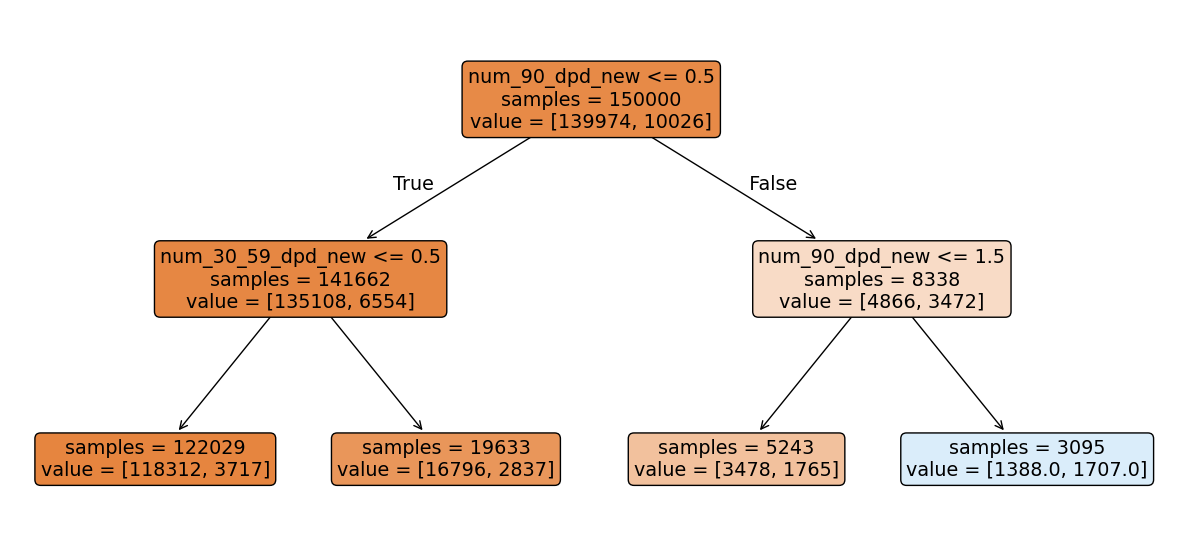

In [149]:
# Plotting the tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree , filled = True , rounded = True , impurity = False  , feature_names = list(X.columns))
print(export_text(Dtree , feature_names = list(X.columns)))
plt.show()

In [150]:
# Finding the accuracy of the model
predict = Dtree.predict(X) ## Prediction using decision tree model

cm = confusion_matrix(y,predict) # constructing the confusion matrix.
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model = " , accuracy)

[[138586   1388]
 [  8319   1707]]
Accuracy of the decision tree model =  0.9352866666666667


## Check for overfitting

When really large tree is build ,  the model is very likely to be overfitted.
Overfitted model means that the train accuracy is very large whereas the test accuracy is considerably very low.
If the train and test accuracy differ by more than 5 points then the model is considered as overfitted model.

In [151]:
X = loans.drop(['Sr_No', 'SeriousDlqin2yrs'],axis = 1)
y = loans['SeriousDlqin2yrs']

# Creating train and test data
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, train_size = 0.8 , random_state = 22)

In [152]:
# training the model
from sklearn import tree
Dtree1 = tree.DecisionTreeClassifier(max_depth = 3)
Dtree1.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

|--- num_90_dpd_new <= 0.50
|   |--- num_30_59_dpd_new <= 0.50
|   |   |--- util_new <= 0.50
|   |   |   |--- class: 0
|   |   |--- util_new >  0.50
|   |   |   |--- class: 0
|   |--- num_30_59_dpd_new >  0.50
|   |   |--- num_60_dpd_new <= 0.50
|   |   |   |--- class: 0
|   |   |--- num_60_dpd_new >  0.50
|   |   |   |--- class: 0
|--- num_90_dpd_new >  0.50
|   |--- num_90_dpd_new <= 1.50
|   |   |--- num_60_dpd_new <= 0.50
|   |   |   |--- class: 0
|   |   |--- num_60_dpd_new >  0.50
|   |   |   |--- class: 0
|   |--- num_90_dpd_new >  1.50
|   |   |--- num_90_dpd_new <= 3.50
|   |   |   |--- class: 1
|   |   |--- num_90_dpd_new >  3.50
|   |   |   |--- class: 1



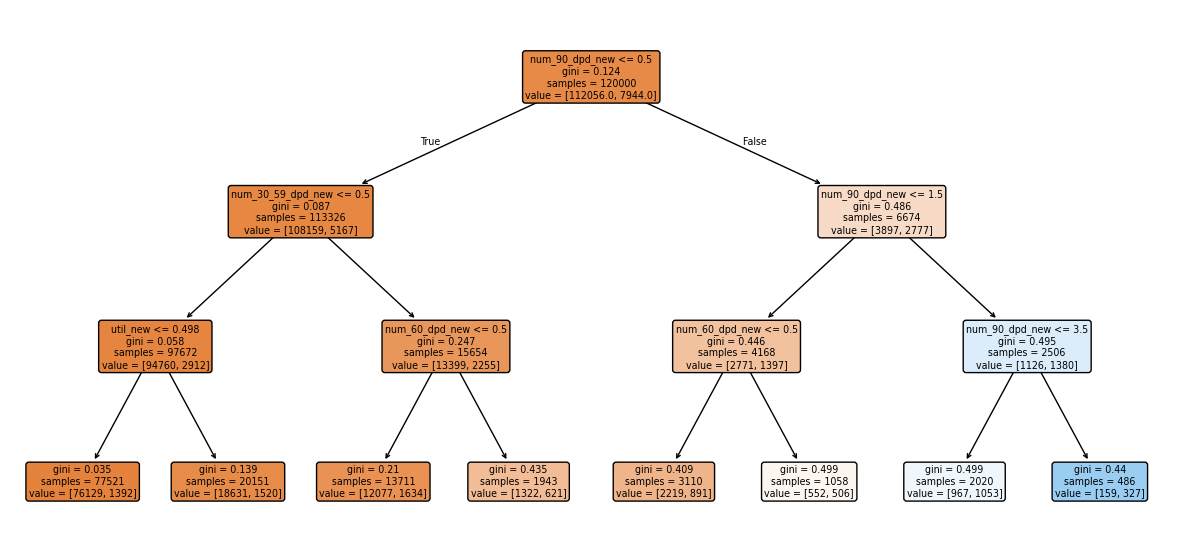

In [153]:
# Plotting the model using train data
from sklearn.tree import plot_tree , export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree1, filled = True , rounded = True , impurity = True , feature_names = list(X.columns))
print( export_text(Dtree1, feature_names =list(X.columns)))


* Train Accuracy

In [154]:
# Finding the accuracy of the model on train data
predict = Dtree1.predict(X_train)

cm = confusion_matrix(y_train,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the  model on train data= " , accuracy)

[[110930   1126]
 [  6564   1380]]
Accuracy of the  model on train data=  0.9359166666666666


In [155]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity of Train data = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty of train data = " , specificity)

Sensitivity of Train data =  0.9899514528450061
Specificty of train data =  0.17371601208459214


* Test Accuracy

In [156]:
# Finding the accuracy of the model on test data
predict = Dtree1.predict(X_test)

cm = confusion_matrix(y_test,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model on test data = " , accuracy)

[[27656   262]
 [ 1755   327]]
Accuracy of the decision tree model on test data =  0.9327666666666666


In [157]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

Sensitivity =  0.990615373594097
Specificty =  0.15706051873198848


Here we can observe that the train and test accuracy are close enough. Hence the model is not overfitted.

* No need to check for underfitting

# Handling Class Imablance using SMOTE technique

In [158]:
from imblearn.over_sampling import SMOTE
# smote=SMOTE(sampling_strategy=0.4, random_state=44)
smote=SMOTE(sampling_strategy=0.3, random_state=32)

X_train_smote, y_train_smote=smote.fit_resample(X_train,y_train)

import collections
print("Before SMOTE", collections.Counter(y_train))
print("After SMOTE", collections.Counter(y_train_smote))

Before SMOTE Counter({0: 112056, 1: 7944})
After SMOTE Counter({0: 112056, 1: 33616})


# Model-3 Logistic Regression with balanced data - SMOTE

In [159]:
model=sm.Logit(y_train_smote,X_train_smote).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.421794
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:       SeriousDlqin2yrs   No. Observations:               145672
Model:                          Logit   Df Residuals:                   145660
Method:                           MLE   Df Model:                           11
Date:                Thu, 20 Mar 2025   Pseudo R-squ.:                  0.2192
Time:                        04:44:24   Log-Likelihood:                -61444.
converged:                       True   LL-Null:                       -78692.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
util_new                   1.5592      0.021     75.635      0.000       1.519      

In [160]:
#Confusion matrix and Accuracy
tran_pred=model.predict(X_train_smote)
test_pred=model.predict(X_test)

#confusion matrix
train_cm=confusion_matrix(y_train_smote,np.round(tran_pred))
test_cm=confusion_matrix(y_test,np.round(test_pred))

print("Train Confusion Matrix\n", train_cm)
print("Test Confusion Matrix\n", test_cm)


Train Confusion Matrix
 [[105662   6394]
 [ 21566  12050]]
Test Confusion Matrix
 [[26351  1567]
 [ 1262   820]]


In [161]:
#Class-0 and Class-1 Accuracy
class_0_acc=train_cm[0,0]/(train_cm[0,0]+train_cm[0,1])
class_1_acc=train_cm[1,1]/(train_cm[1,0]+train_cm[1,1])

print("Class-0 Accuracy", class_0_acc)
print("Class-1 Accuracy", class_1_acc)

Class-0 Accuracy 0.9429392446633826
Class-1 Accuracy 0.35846025702046647


In [162]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, np.round(test_pred))
print(f'Accuracy: {accuracy}')

Accuracy: 0.9057


In [163]:
#Class-0 and Class-1 Accuracy on test data
class_0_acc=test_cm[0,0]/(test_cm[0,0]+test_cm[0,1])
class_1_acc=test_cm[1,1]/(test_cm[1,0]+test_cm[1,1])

print("Class-0 Accuracy", class_0_acc)
print("Class-1 Accuracy", class_1_acc)

Class-0 Accuracy 0.9438713374883587
Class-1 Accuracy 0.39385206532180594


* Specificity has increased

# Model-4: Decision Tree on Balanced Data -SMOTE

* with max depth = 2

In [164]:
# training the model
from sklearn import tree
Dtree2 = tree.DecisionTreeClassifier(max_depth = 2) #observe and change to 3
Dtree2.fit(X_train_smote,y_train_smote) # Fit model on balanced data.

DecisionTreeClassifier(max_depth=2)

|--- util_new <= 0.15
|   |--- num_90_dpd_new <= 0.50
|   |   |--- class: 0
|   |--- num_90_dpd_new >  0.50
|   |   |--- class: 0
|--- util_new >  0.15
|   |--- num_90_dpd_new <= 0.50
|   |   |--- class: 0
|   |--- num_90_dpd_new >  0.50
|   |   |--- class: 1



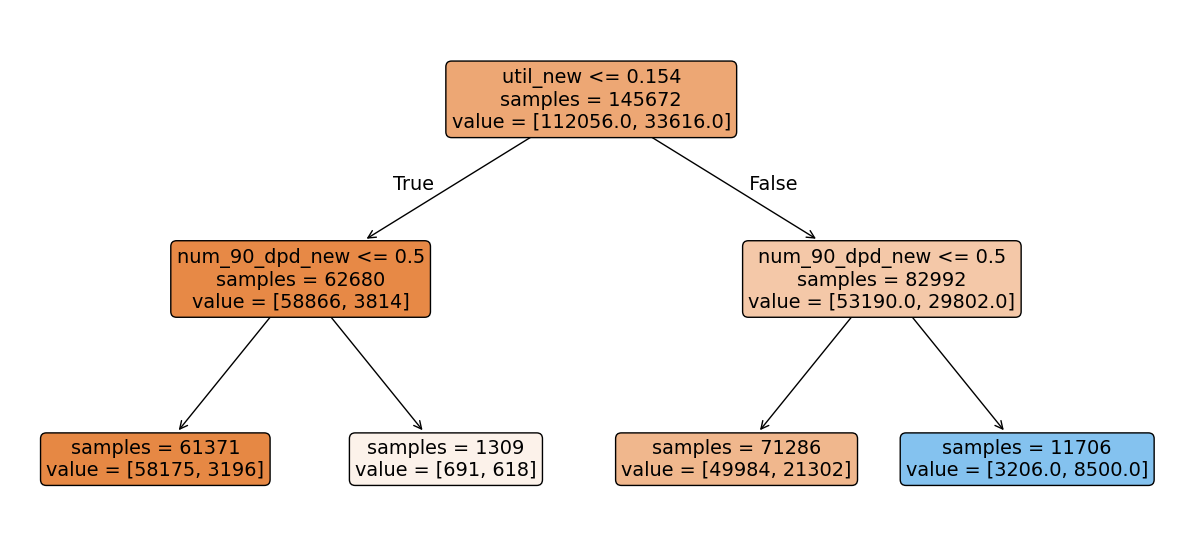

In [165]:
# Plotting the model using train data
from sklearn.tree import plot_tree , export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree2, filled = True , rounded = True , impurity = False , feature_names = list(X_train_smote.columns))
print( export_text(Dtree2, feature_names =list(X_train_smote.columns)))

In [166]:
# Finding the accuracy of the model on train data
predict = Dtree2.predict(X_train_smote)

cm = confusion_matrix(y_train_smote,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the  model on train data= " , accuracy)

[[108850   3206]
 [ 25116   8500]]
Accuracy of the  model on train data=  0.8055769125157889


In [167]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

Sensitivity =  0.9713893053473264
Specificty =  0.252855782960495


In [168]:
# Finding the accuracy of the model on test data
predict = Dtree2.predict(X_test)

cm = confusion_matrix(y_test,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model on test data = " , accuracy)

[[27117   801]
 [ 1438   644]]
Accuracy of the decision tree model on test data =  0.9253666666666667


In [169]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

Sensitivity =  0.9713088330109607
Specificty =  0.30931796349663787


* With Max_depth = 3

In [170]:
# training the model
from sklearn import tree
Dtree2 = tree.DecisionTreeClassifier(max_depth = 3) #observe and change to 3
Dtree2.fit(X_train_smote,y_train_smote) # Fit model on balanced data.

DecisionTreeClassifier(max_depth=3)

|--- util_new <= 0.15
|   |--- num_90_dpd_new <= 0.50
|   |   |--- num_30_59_dpd_new <= 0.50
|   |   |   |--- class: 0
|   |   |--- num_30_59_dpd_new >  0.50
|   |   |   |--- class: 0
|   |--- num_90_dpd_new >  0.50
|   |   |--- num_90_dpd_new <= 1.50
|   |   |   |--- class: 0
|   |   |--- num_90_dpd_new >  1.50
|   |   |   |--- class: 1
|--- util_new >  0.15
|   |--- num_90_dpd_new <= 0.50
|   |   |--- num_30_59_dpd_new <= 0.50
|   |   |   |--- class: 0
|   |   |--- num_30_59_dpd_new >  0.50
|   |   |   |--- class: 0
|   |--- num_90_dpd_new >  0.50
|   |   |--- util_new <= 1.00
|   |   |   |--- class: 1
|   |   |--- util_new >  1.00
|   |   |   |--- class: 1



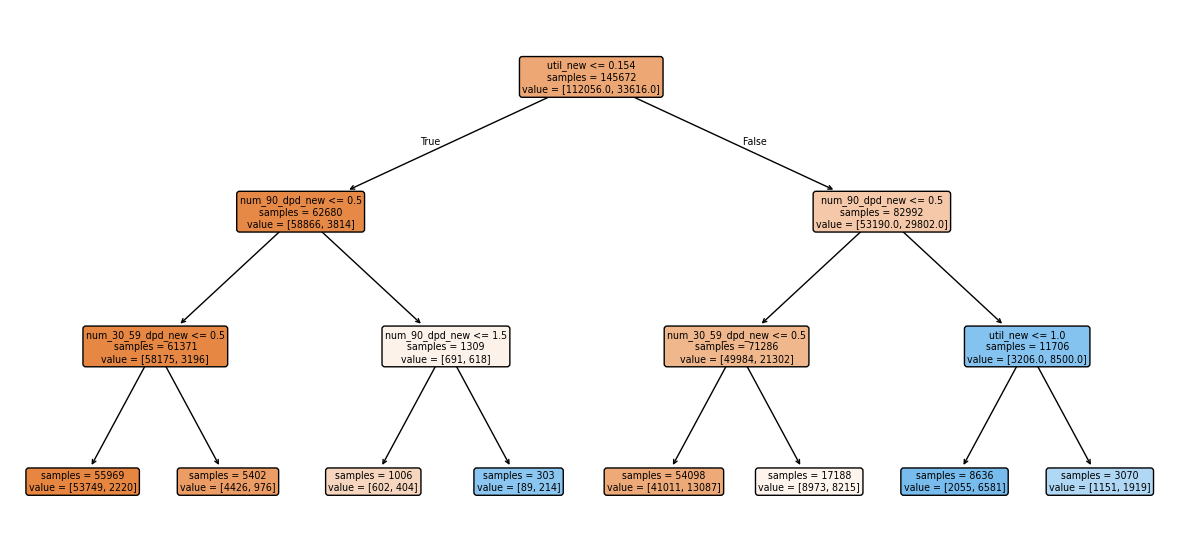

In [171]:
# Plotting the model using train data
from sklearn.tree import plot_tree , export_text
plt.figure(figsize = (15,7))
plot_tree(Dtree2, filled = True , rounded = True , impurity = False , feature_names = list(X_train_smote.columns))
print( export_text(Dtree2, feature_names =list(X_train_smote.columns)))

In [172]:
# Finding the accuracy of the model on train data
predict = Dtree2.predict(X_train_smote)

cm = confusion_matrix(y_train_smote,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the  model on train data= " , accuracy)

[[108761   3295]
 [ 24902   8714]]
Accuracy of the  model on train data=  0.8064350046680213


In [173]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

Sensitivity =  0.9705950596130506
Specificty =  0.2592217991432651


In [174]:
# Finding the accuracy of the model on test data
predict = Dtree2.predict(X_test)

cm = confusion_matrix(y_test,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model on test data = " , accuracy)

[[27103   815]
 [ 1421   661]]
Accuracy of the decision tree model on test data =  0.9254666666666667


In [175]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

Sensitivity =  0.9708073644243858
Specificty =  0.3174831892411143


* with max_depth=13

In [176]:
# training the model
from sklearn import tree
Dtree2 = tree.DecisionTreeClassifier(max_depth = 13) #observe and change to 3
Dtree2.fit(X_train_smote,y_train_smote) # Fit model on balanced data.

DecisionTreeClassifier(max_depth=13)

[Text(0.4504722461365817, 0.9642857142857143, 'util_new <= 0.154\nsamples = 145672\nvalue = [112056.0, 33616.0]'),
 Text(0.18781454521313048, 0.8928571428571429, 'num_90_dpd_new <= 0.5\nsamples = 62680\nvalue = [58866, 3814]'),
 Text(0.3191433956748561, 0.9285714285714286, 'True  '),
 Text(0.11707560221354167, 0.8214285714285714, 'num_30_59_dpd_new <= 0.5\nsamples = 61371\nvalue = [58175, 3196]'),
 Text(0.06157483552631579, 0.75, 'util_new <= 0.063\nsamples = 55969\nvalue = [53749, 2220]'),
 Text(0.03386915775767544, 0.6785714285714286, 'num_60_dpd_new <= 1.5\nsamples = 39658\nvalue = [38630, 1028]'),
 Text(0.025523403234649123, 0.6071428571428571, 'num_60_dpd_new <= 0.5\nsamples = 39628\nvalue = [38616.0, 1012.0]'),
 Text(0.012969435307017545, 0.5357142857142857, 'Open_Credit_lines_new <= 6.5\nsamples = 39244\nvalue = [38275, 969]'),
 Text(0.006972998903508772, 0.4642857142857143, 'age_new <= 34.5\nsamples = 16344\nvalue = [16094, 250]'),
 Text(0.003426535087719298, 0.3928571428571428

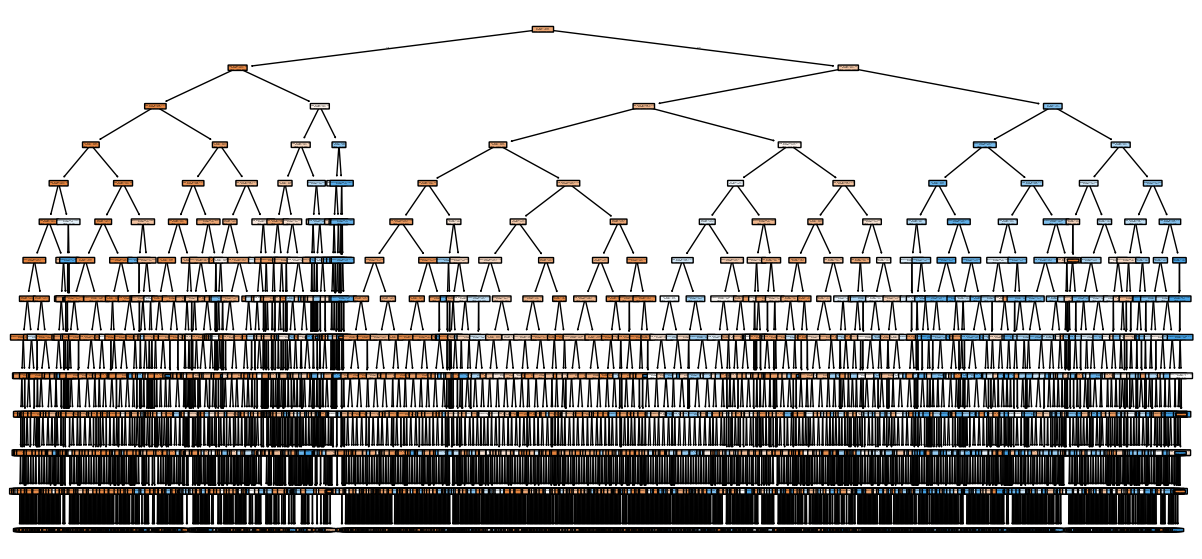

In [177]:
# Plotting the model using train data
from sklearn.tree import plot_tree , export_text
plt.figure(figsize = (15,7))
# plot_tree(Dtree2, filled = True , rounded = True , impurity = False , feature_names = list(X_train_smote.columns))
# print( export_text(Dtree2, feature_names =list(X_train_smote.columns)))

In [178]:
# Finding the accuracy of the model on train data
predict = Dtree2.predict(X_train_smote)

cm = confusion_matrix(y_train_smote,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the  model on train data= " , accuracy)

[[105870   6186]
 [ 14710  18906]]
Accuracy of the  model on train data=  0.856554451095612


In [179]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

Sensitivity =  0.9447954594131506
Specificty =  0.5624107567824845


In [180]:
# Finding the accuracy of the model on test data
predict = Dtree2.predict(X_test)

cm = confusion_matrix(y_test,predict)
print(cm)

total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / total
print("Accuracy of the decision tree model on test data = " , accuracy)

[[25802  2116]
 [ 1235   847]]
Accuracy of the decision tree model on test data =  0.8883


In [181]:
sensitivity = (cm[0,0]) / (cm[0,0]+cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = (cm[1,1]) / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

Sensitivity =  0.9242066050576689
Specificty =  0.4068203650336215


## Experimenting with Different `max_depth` Values**
Try different values for `max_depth` and compare accuracy:
```python
for depth in [1, 2, 3, 5]:
    Dtree = DecisionTreeClassifier(max_depth=depth)
    Dtree.fit(X, y)
    y_pred = Dtree.predict(X)
    y_pred_train = Dtree.predict(X_train)
    y_pred_train_balanced = Dtree.predict(X_train_balanced)
    y_pred_test = Dtree.predict(X_test)


    acc = accuracy_score(y, y_pred)
    train_accuracy = accuracy_score(y_train,y_pred_train)
    balanced_train_accuracy = accuracy_score(y_train_balanced,y_pred_train_balanced)
    test_accuracy = accuracy_score(y_test,y_pred_test)
    print(f"Accuracy for max_depth={depth}: {acc:.4f}")
```
- This helps **find the best depth** for your dataset.

**Summary of Model building**

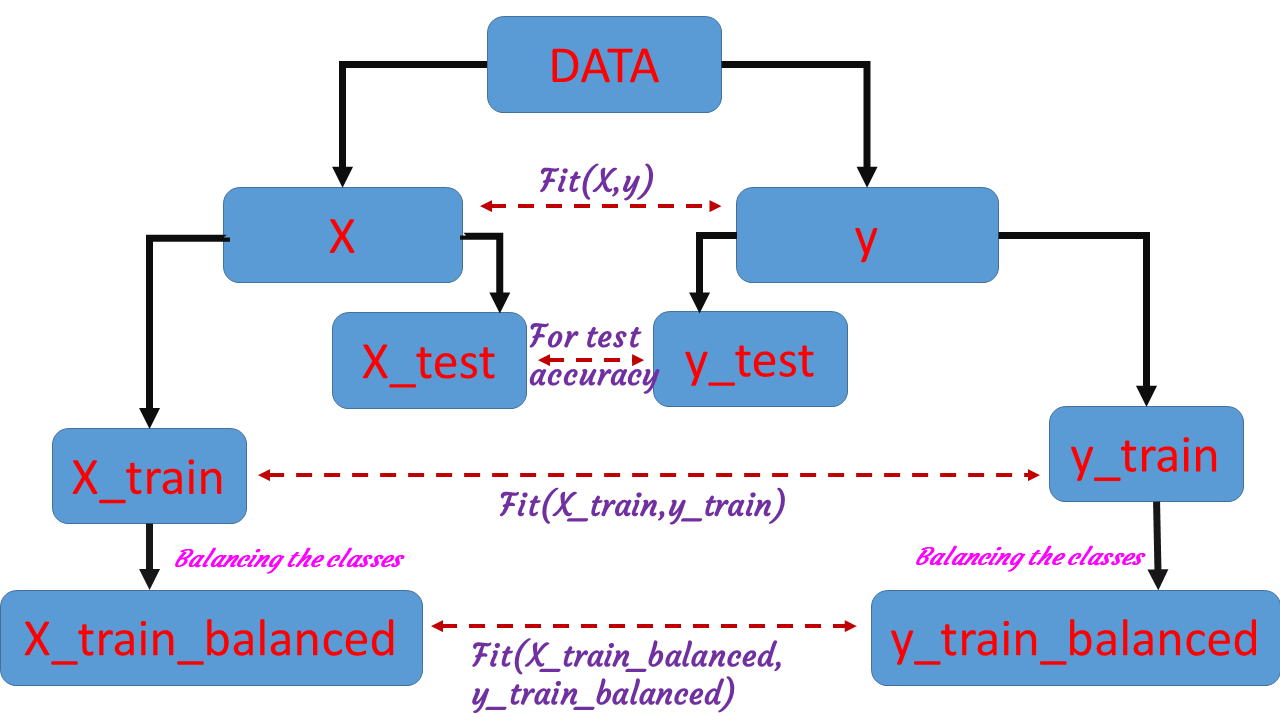


- Load the dataset and create a data frame.
- Perform basic exploration of the data frame.
- Categorize variables into:
  - **Discrete**: Frequency plot, percentiles
  - **Continuous**: Boxplots, percentiles, histplot
  - **Categorical**: Frequency plots
- **Thresholds**: Obtain from client or from data.
- Clean the data and create the final data frame.
- **Model Building**:
  - Split `X` and `y`.
  - Use `X` and `y` to build the model.
  - Or, split `X` and `y` into `X_train`, `y_train`, `X_test`, `y_test`.
  - Build models and check accuracy, sensitivity, specificity.



#### **Which Parameters to use When**
| **Variables used for <br> Model building** | **Variable to be <br> used for Prediction** | **Variables to be <br> used for Confusion matrix** |
|------------|------------------------|--------------------|
| **.fit(X,y)** | **y_pred = .predict(X)** | **confusion_matrix(y, y_pred)** |
| **.fit(X_train,y_train)** | **y_pred_train = .predict(X_train)** | **confusion_matrix(y_train, y_pred_train)** |
| **.fit(X_train_balanced,y_train_balanced)** | **y_pred_train_balanced = .predict(X_train_balanced)** | **confusion_matrix(y_train_balanced, y_pred_train_balanced)** |


$\bullet$ **X_test and y_test will never be used to build the model, but are only used for determining accuracy, recall, precision on test data**.


In [182]:
# prompt: create random forest model for x_train_smote and y_train_smote

from sklearn.ensemble import RandomForestClassifier

# Assuming x_train_smote and y_train_smote are defined
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_smote, y_train_smote)
# rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [183]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score# Make predictions
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Calculate sensitivity and specificity for each class
sensitivity = cm.diagonal() / cm.sum(axis=1)
specificity = (cm.sum() - (cm.sum(axis=1) + cm.sum(axis=0) - cm.diagonal())) / (cm.sum() - cm.sum(axis=1))


total = sum(sum(cm))
accuracy = (cm[0,0] + cm[1,1]) / (total)
print("Overall accuracy = " , accuracy)

sensitivity = (cm[0,0]) / (cm[0,0] + cm[0,1])
print("Sensitivity = " , sensitivity)

specificity = cm[1,1] / (cm[1,0] + cm[1,1])
print("Specificty = " , specificity)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Sensitivity: {sensitivity}")
print(f"Specificity: {specificity}")



[[26364  1554]
 [ 1347   735]]
Overall accuracy =  0.9033
Sensitivity =  0.9443369868901784
Specificty =  0.3530259365994236
Accuracy: 0.9033
Precision: 0.9076
Recall: 0.9033
F1 Score: 0.9054
Sensitivity: 0.9443369868901784
Specificity: 0.3530259365994236
